In [1]:
## Loading required package: limma
library(limma)
library(RColorBrewer)
library(mixOmics)
library(ggplot2)
library(edgeR)
library(HTSFilter)
library(Matrix)
library(plyr)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(Rcpp)
library(dplyr)    # alternatively, this also loads %>%
# First reading the data
options(warn=-1)

#The root directory
dir="../counts"
setwd(dir)

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.10.9
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Linear Exonic 

### Bovine

In [2]:
Data = read.table("bos_taurus_linear_counts.tsv", header=T, sep="\t")

In [3]:
head(Data)

,gene_id,bta_liver_1,bta_liver_2,bta_liver_3,bta_liver_4,bta_liver_5,bta_liver_6,bta_liver_7,bta_liver_8,bta_liver_9,⋯,bta_muscle_9,bta_muscle_10,bta_muscle_11,bta_muscle_12,bta_testis_1,bta_testis_2,bta_testis_3,bta_testis_4,bta_testis_5,bta_testis_6
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSBTAG00000000005,678,840.00,530,624.00,684.00,684.10,399.00,442.00,595,⋯,51,49,78.00,56,504.00,311,486,2199,3323,2697
2,ENSBTAG00000000008,0,0.00,0,1.00,0.00,1.00,1.00,0.00,1,⋯,0,0,1.00,0,1.00,1,1,54,59,32
3,ENSBTAG00000000009,85,51.00,41,52.00,34.00,30.00,23.00,28.00,41,⋯,4,3,6.00,7,50.00,38,62,14,19,20
4,ENSBTAG00000000010,611,665.00,861,853.00,820.00,1043.00,808.00,802.00,735,⋯,401,441,425.91,452,565.42,362,602,306,383,380
5,ENSBTAG00000000011,6752,8747.02,13318,11180.77,16440.29,14882.26,5955.00,13134.27,5914,⋯,3,6,1.00,4,21.00,20,9,66,102,76
6,ENSBTAG00000000012,428,384.00,437,387.00,484.00,496.00,482.06,405.00,420,⋯,215,244,289.00,370,321.00,491,462,902,1360,713


In [4]:
Counts = round(data.frame(Data[,-1], row.names = Data[,1]))
pseudoCounts <- log2(Counts+1)

In [5]:
head(Counts)

,bta_liver_1,bta_liver_2,bta_liver_3,bta_liver_4,bta_liver_5,bta_liver_6,bta_liver_7,bta_liver_8,bta_liver_9,bta_liver_10,⋯,bta_muscle_9,bta_muscle_10,bta_muscle_11,bta_muscle_12,bta_testis_1,bta_testis_2,bta_testis_3,bta_testis_4,bta_testis_5,bta_testis_6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSBTAG00000000005,678,840,530,624,684,684,399,442,595,629,⋯,51,49,78,56,504,311,486,2199,3323,2697
ENSBTAG00000000008,0,0,0,1,0,1,1,0,1,0,⋯,0,0,1,0,1,1,1,54,59,32
ENSBTAG00000000009,85,51,41,52,34,30,23,28,41,44,⋯,4,3,6,7,50,38,62,14,19,20
ENSBTAG00000000010,611,665,861,853,820,1043,808,802,735,890,⋯,401,441,426,452,565,362,602,306,383,380
ENSBTAG00000000011,6752,8747,13318,11181,16440,14882,5955,13134,5914,18544,⋯,3,6,1,4,21,20,9,66,102,76
ENSBTAG00000000012,428,384,437,387,484,496,482,405,420,486,⋯,215,244,289,370,321,491,462,902,1360,713


In [6]:
sum(Counts$bta_liver_2)

[1] 41461066

In [7]:
sum(Counts$bta_liver_13)

[1] 17899301

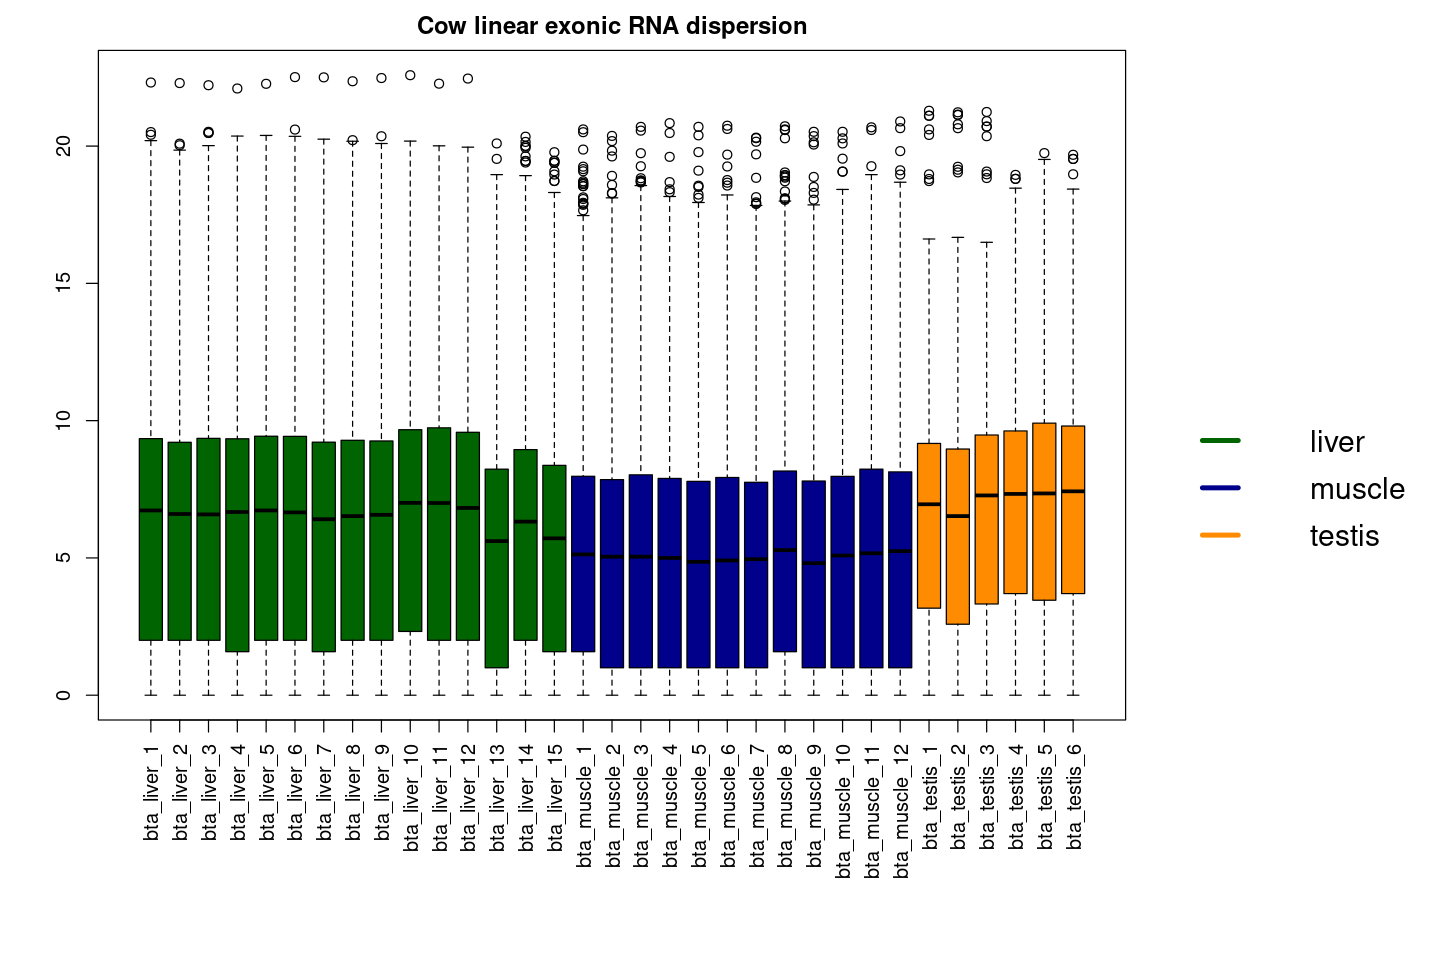

In [8]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="Cow linear exonic RNA dispersion")
par(xpd=TRUE)
legend(35, 11, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

#### Normalization

In [9]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

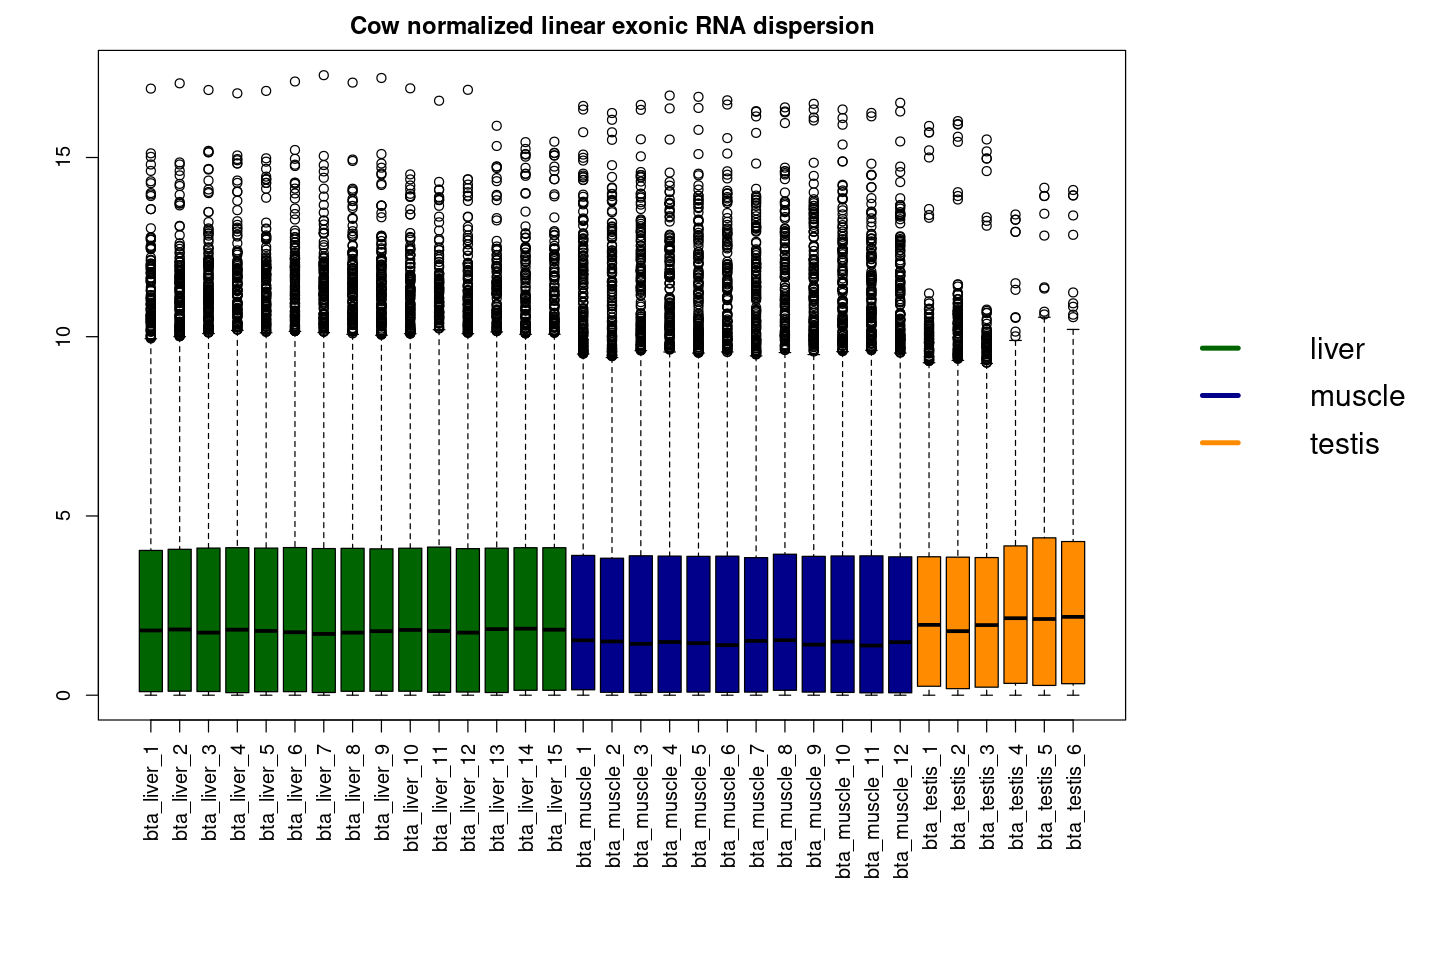

In [10]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="Cow normalized linear exonic RNA dispersion")
par(xpd=TRUE)
legend(35, 11, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

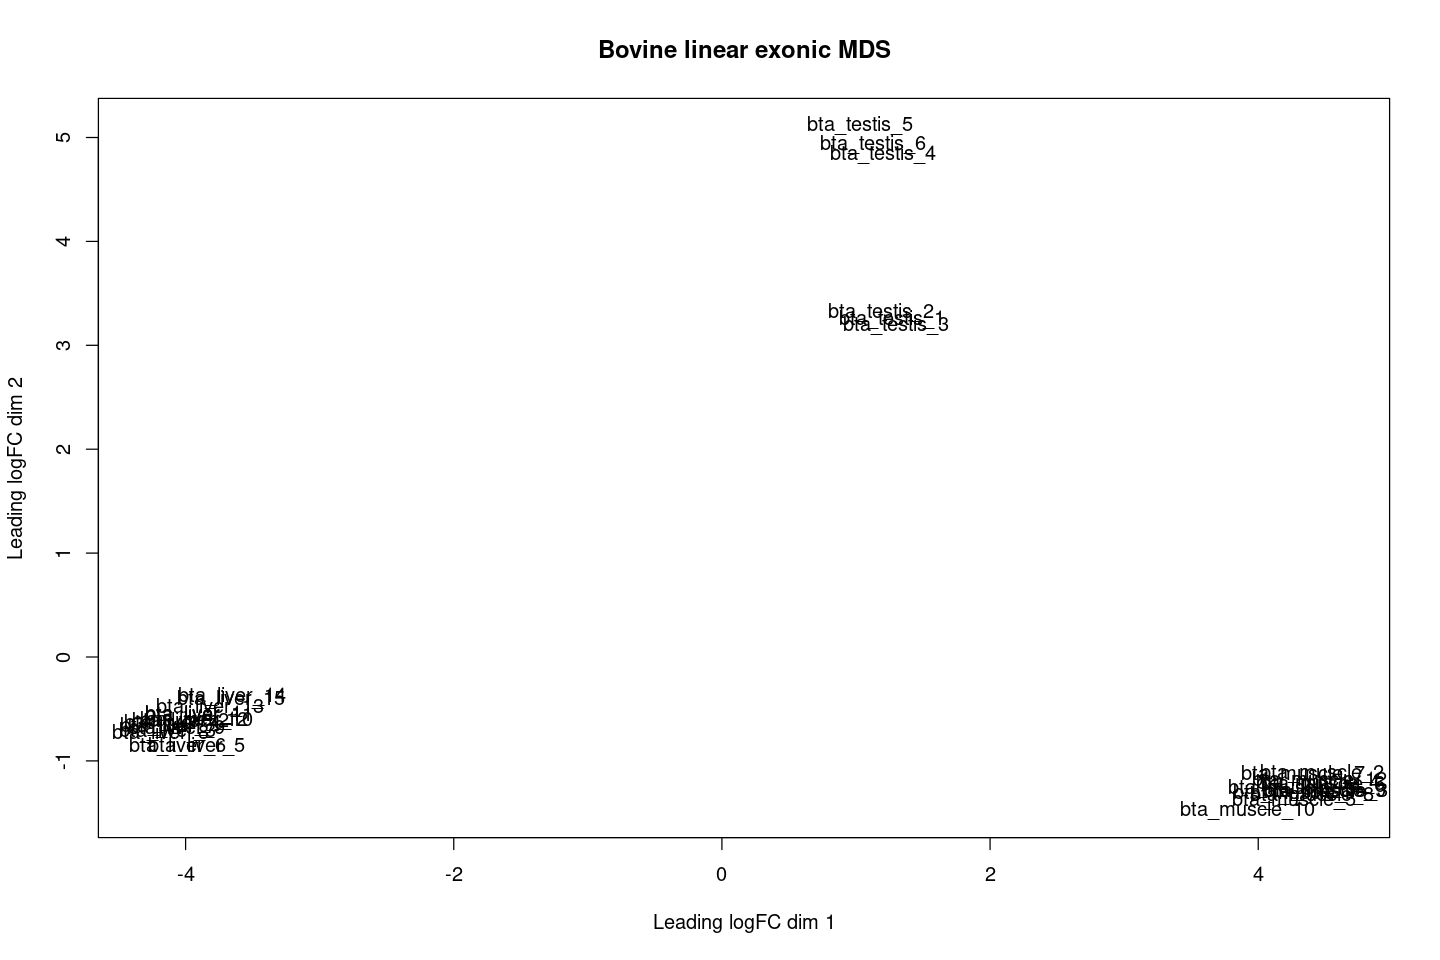

In [11]:
plotMDS(pseudoNormCounts)
title("Bovine linear exonic MDS")

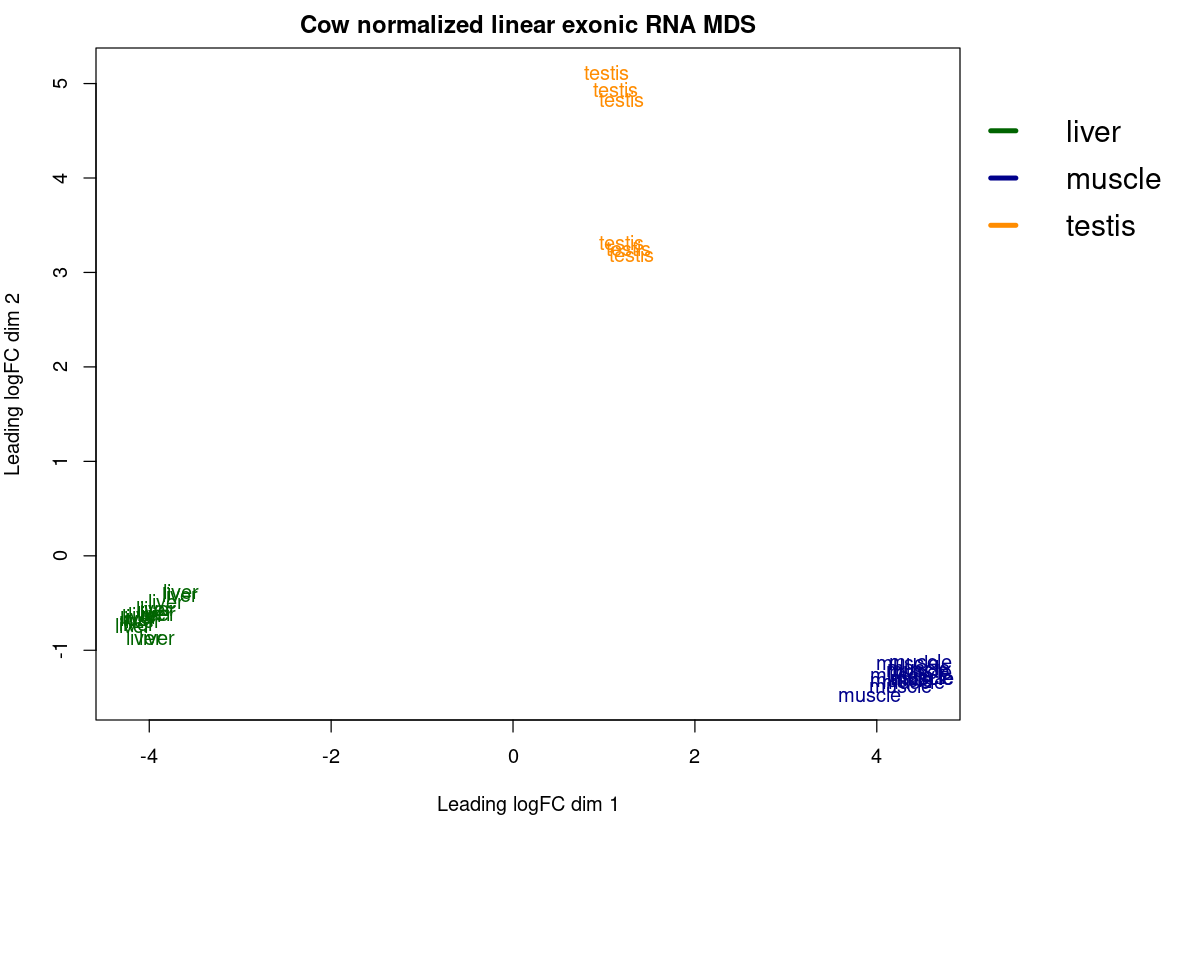

In [12]:
options(repr.plot.width=10, repr.plot.height=8)
labels = c(rep("liver",15), rep("muscle",12), rep("testis", 6))
col = c(rep("darkgreen", 15), rep("darkblue", 12), rep("darkorange", 6))
par(mar=c(10, 4, 2, 10))
par(xpd=FALSE)
plotMDS(pseudoNormCounts, label=labels, col=col)
title("Cow normalized linear exonic RNA MDS")
par(xpd=TRUE)
legend(4.7, 5, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

### Sheep

In [13]:
Data = read.table("ovis_aries_linear_counts.tsv", header=T, sep="\t")

In [14]:
Counts = round(data.frame(Data[,-1], row.names = Data[,1]))
pseudoCounts <- log2(Counts+1)

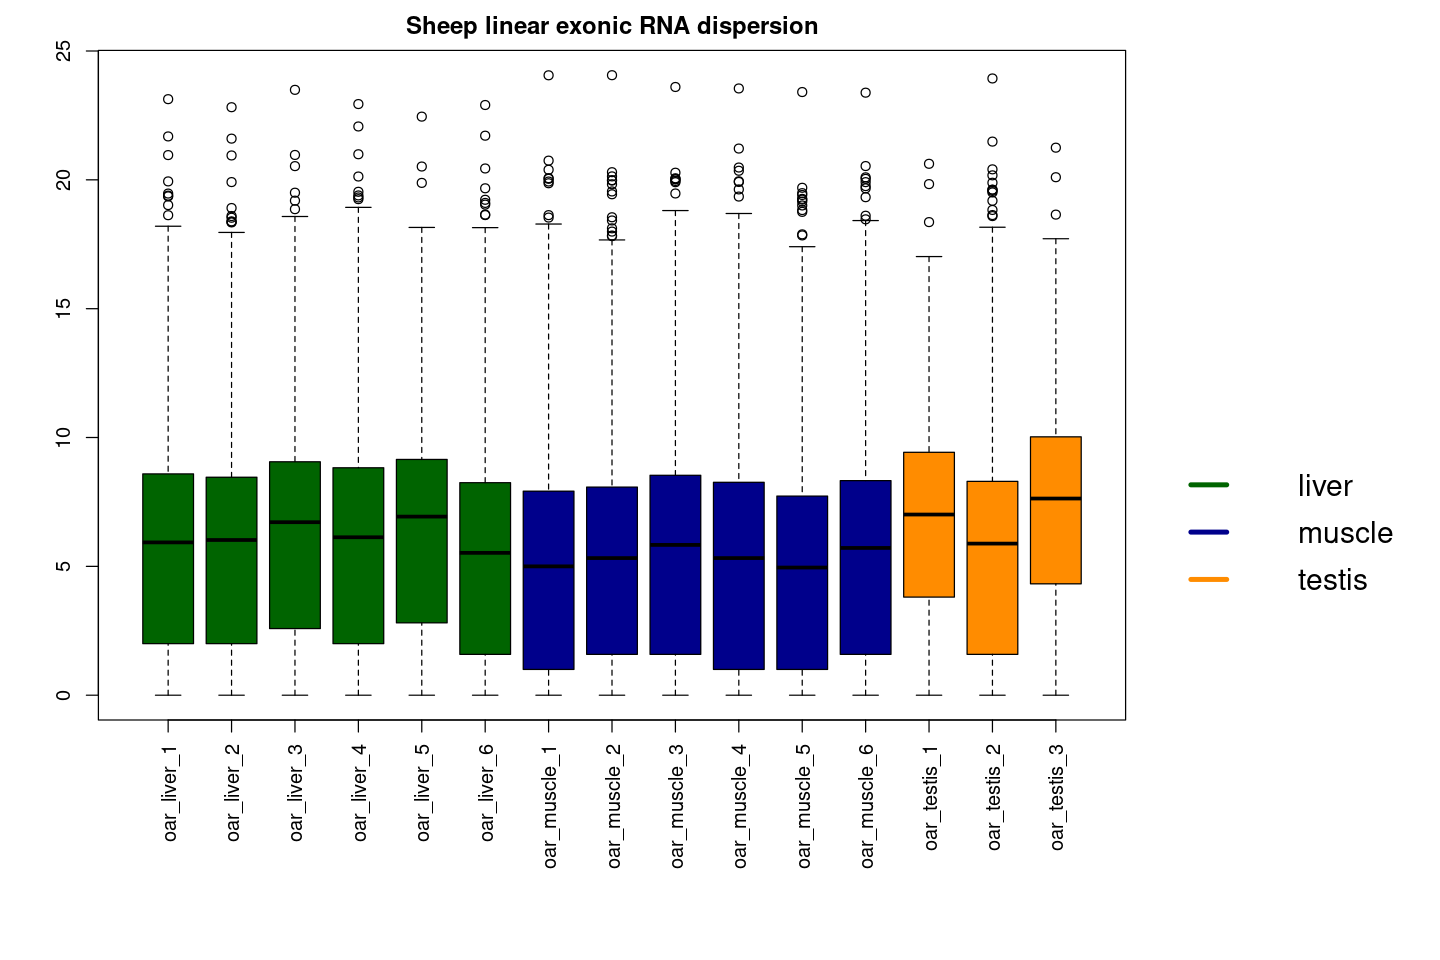

In [15]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 6), rep("darkblue", 6), rep("darkorange", 3))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="Sheep linear exonic RNA dispersion")
par(xpd=TRUE)
legend(16, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

In [16]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

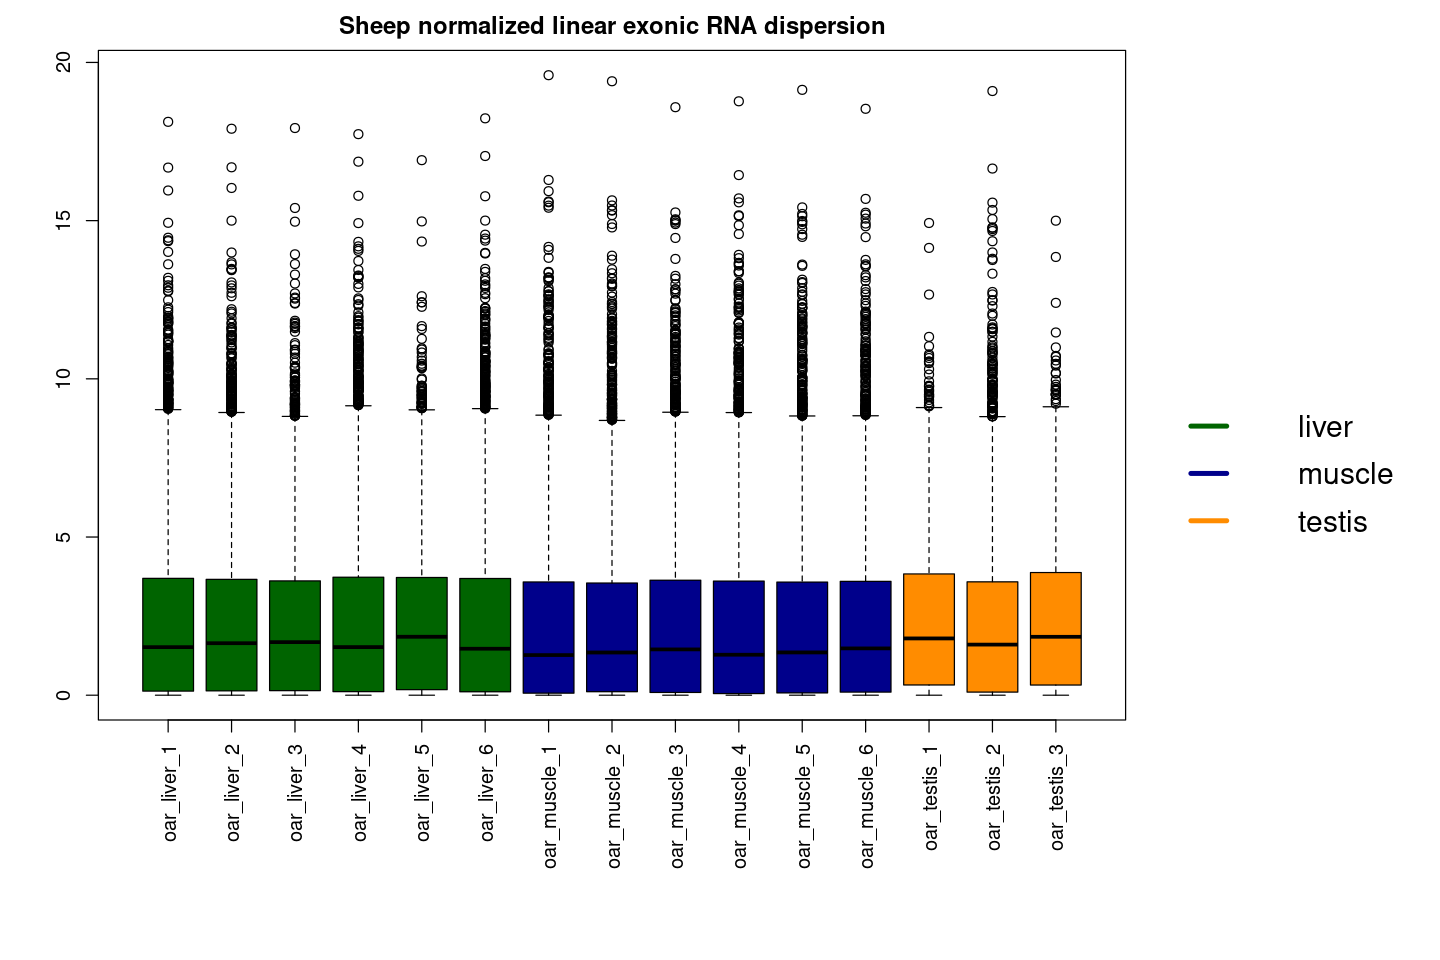

In [17]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 6), rep("darkblue", 6), rep("darkorange", 3))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="Sheep normalized linear exonic RNA dispersion")
par(xpd=TRUE)
legend(16, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

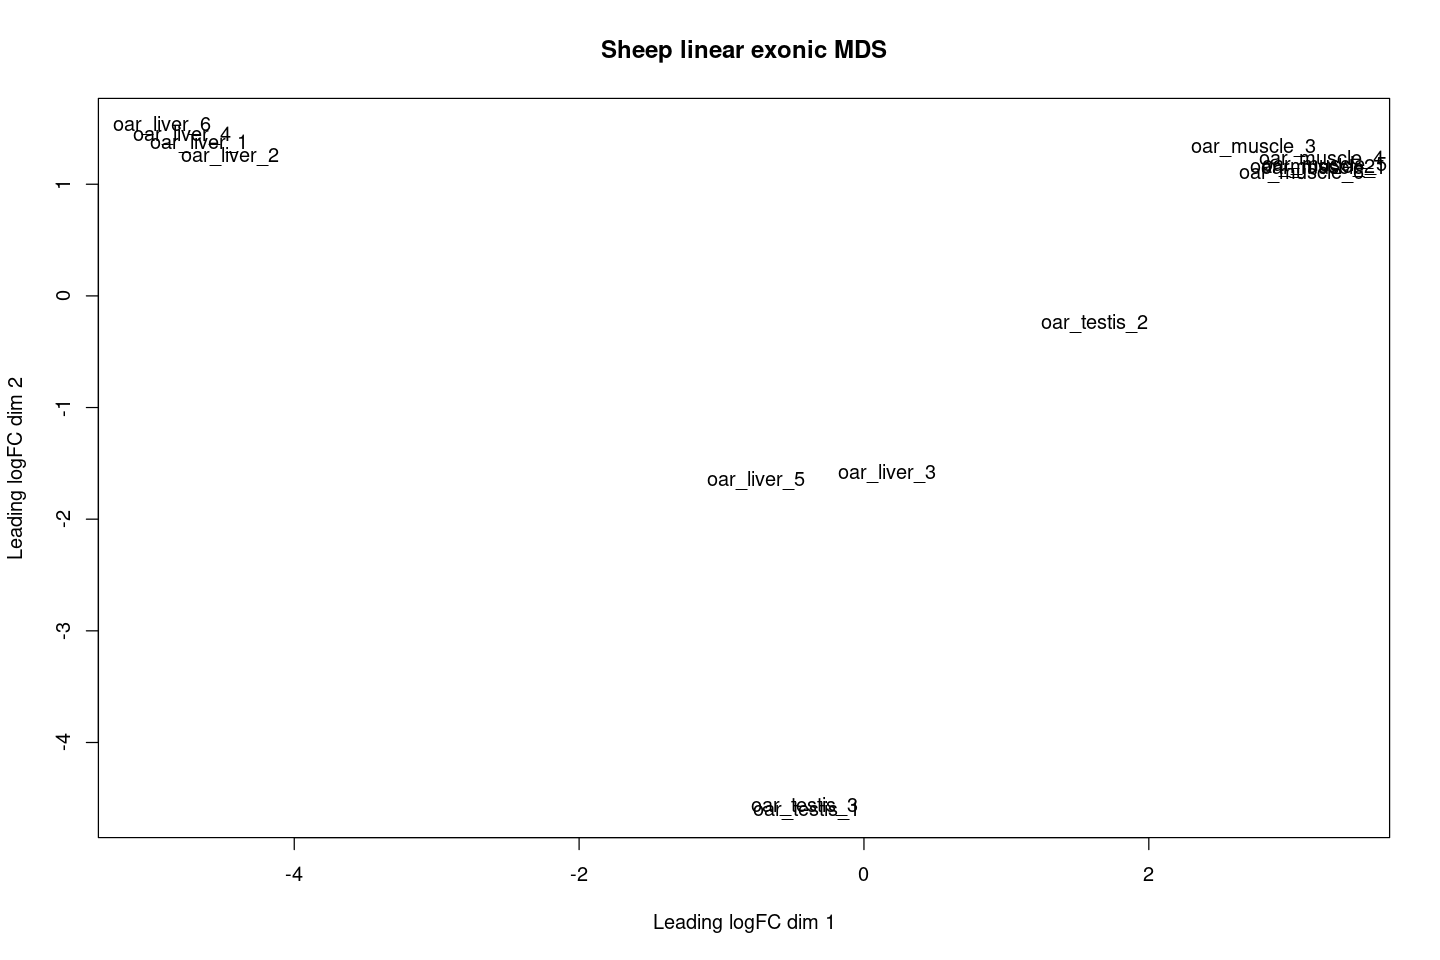

In [18]:
plotMDS(pseudoNormCounts)
title("Sheep linear exonic MDS")

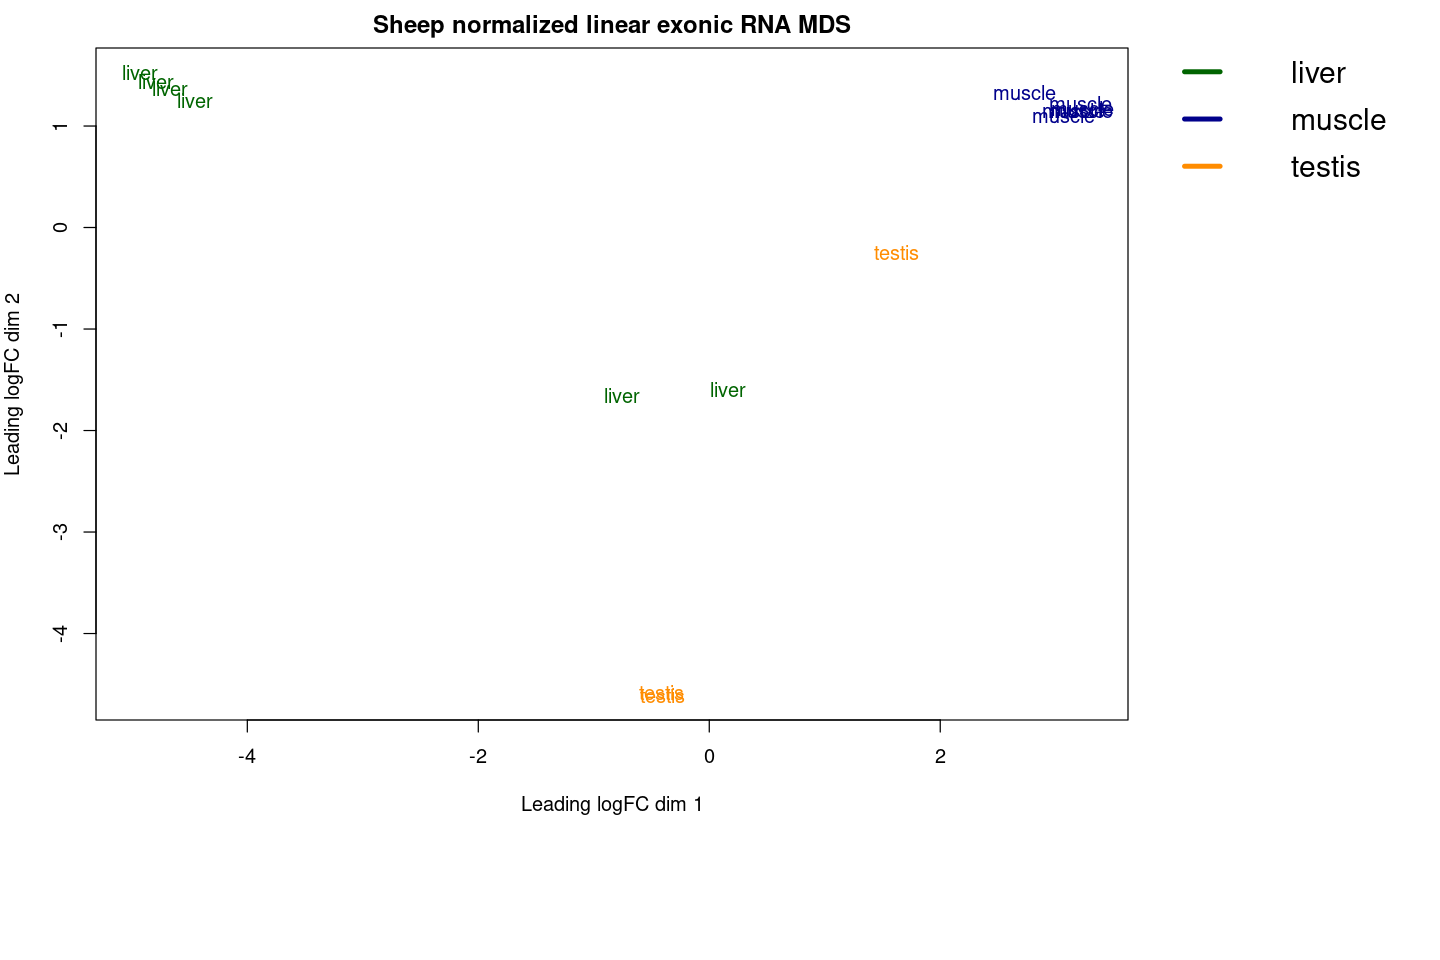

In [19]:
options(repr.plot.width=12, repr.plot.height=8)
labels = c(rep("liver",6), rep("muscle",6), rep("testis", 3))
col = c(rep("darkgreen", 6), rep("darkblue", 6), rep("darkorange", 3))
par(mar=c(10, 4, 2, 13))
par(xpd=FALSE)
plotMDS(pseudoNormCounts, label=labels, col=col)
title("Sheep normalized linear exonic RNA MDS")
par(xpd=TRUE)
legend(3.5, 2, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

### Pig

In [20]:
Data = read.table("sus_scrofa_linear_counts.tsv", header=T, sep="\t")

In [21]:
Counts = round(data.frame(Data[,-1], row.names = Data[,1]))
pseudoCounts <- log2(Counts+1)

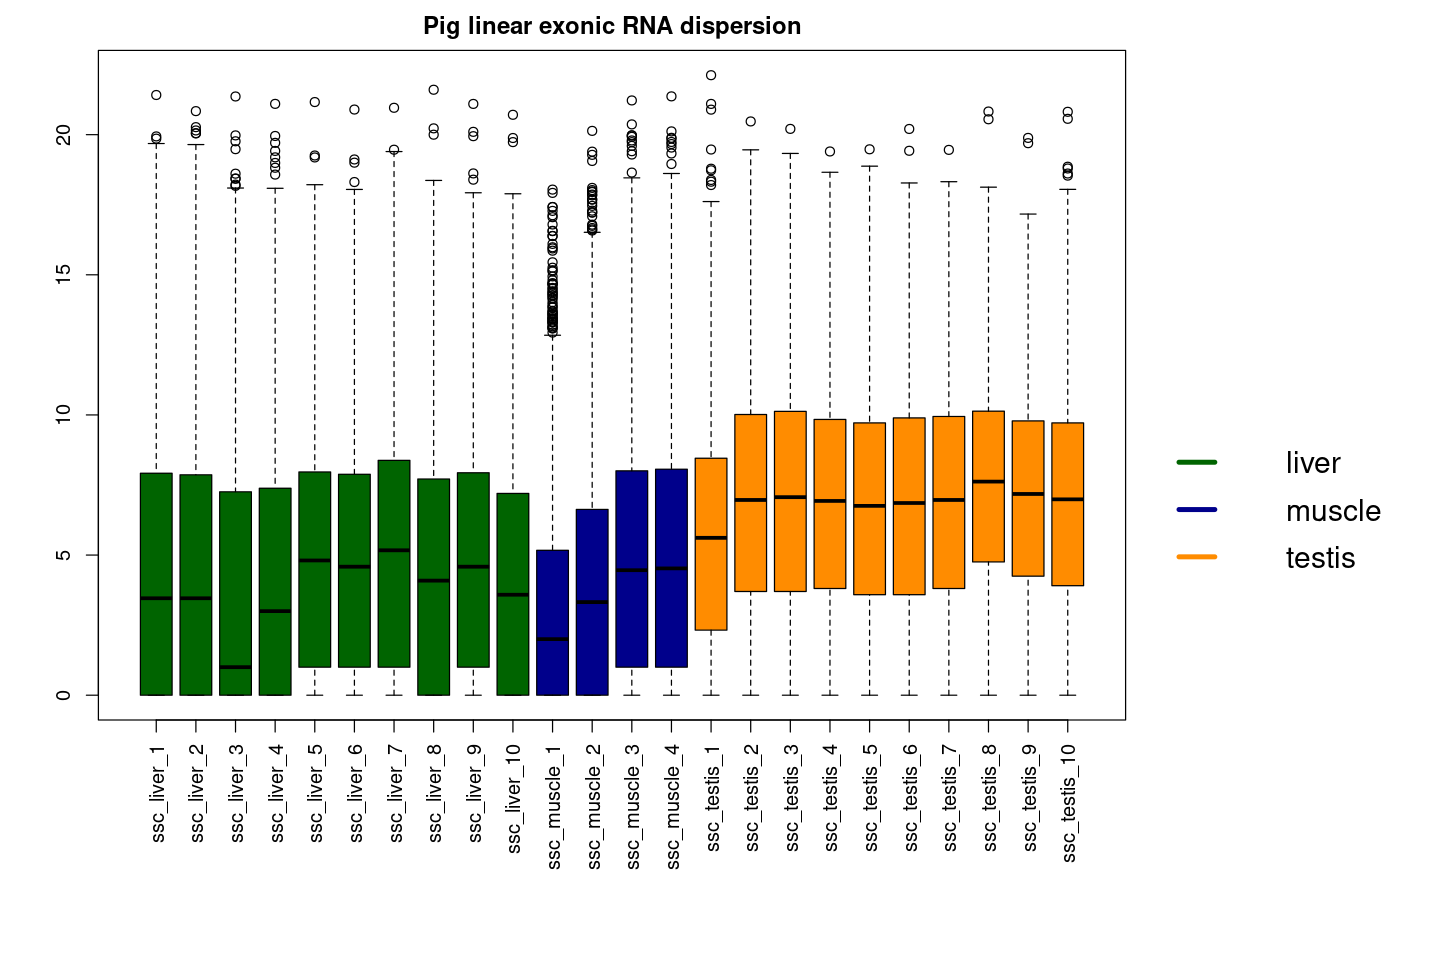

In [22]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 10), rep("darkblue", 4), rep("darkorange", 10))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoCounts, col=colors, las=3, main="Pig linear exonic RNA dispersion")
par(xpd=TRUE)
legend(25, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

In [23]:
dgeCounts <- DGEList(Counts)

# We normalize the data in order to take into account the different overall number of reads between samples
dgeCounts <- calcNormFactors(dgeCounts, method="TMM")
eff.lib.size <- dgeCounts$samples$lib.size*dgeCounts$samples$norm.factors
normCounts <- sweep(dgeCounts$counts, 2, eff.lib.size, "/")*10^6

# which is equivalent to normCounts <- cpm(dgeFull)
pseudoNormCounts <- log2(normCounts + 1)

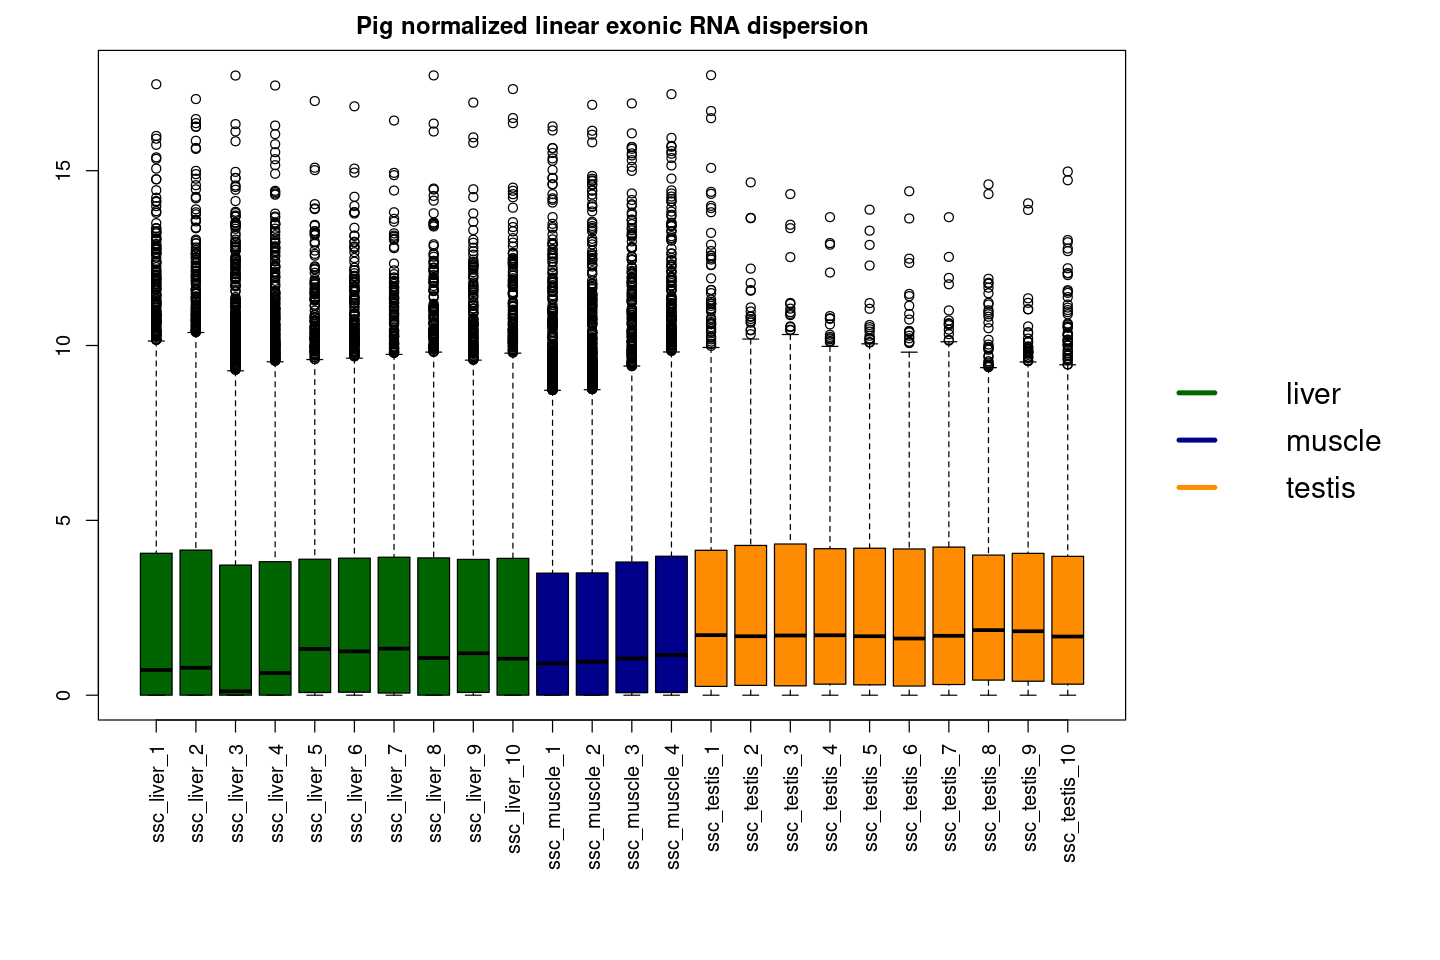

In [24]:
options(repr.plot.width=12, repr.plot.height=8)
colors =  c(rep("darkgreen", 10), rep("darkblue", 4), rep("darkorange", 10))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
boxplot(pseudoNormCounts, col=colors, las=3, main="Pig normalized linear exonic RNA dispersion")
par(xpd=TRUE)
legend(25, 10, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

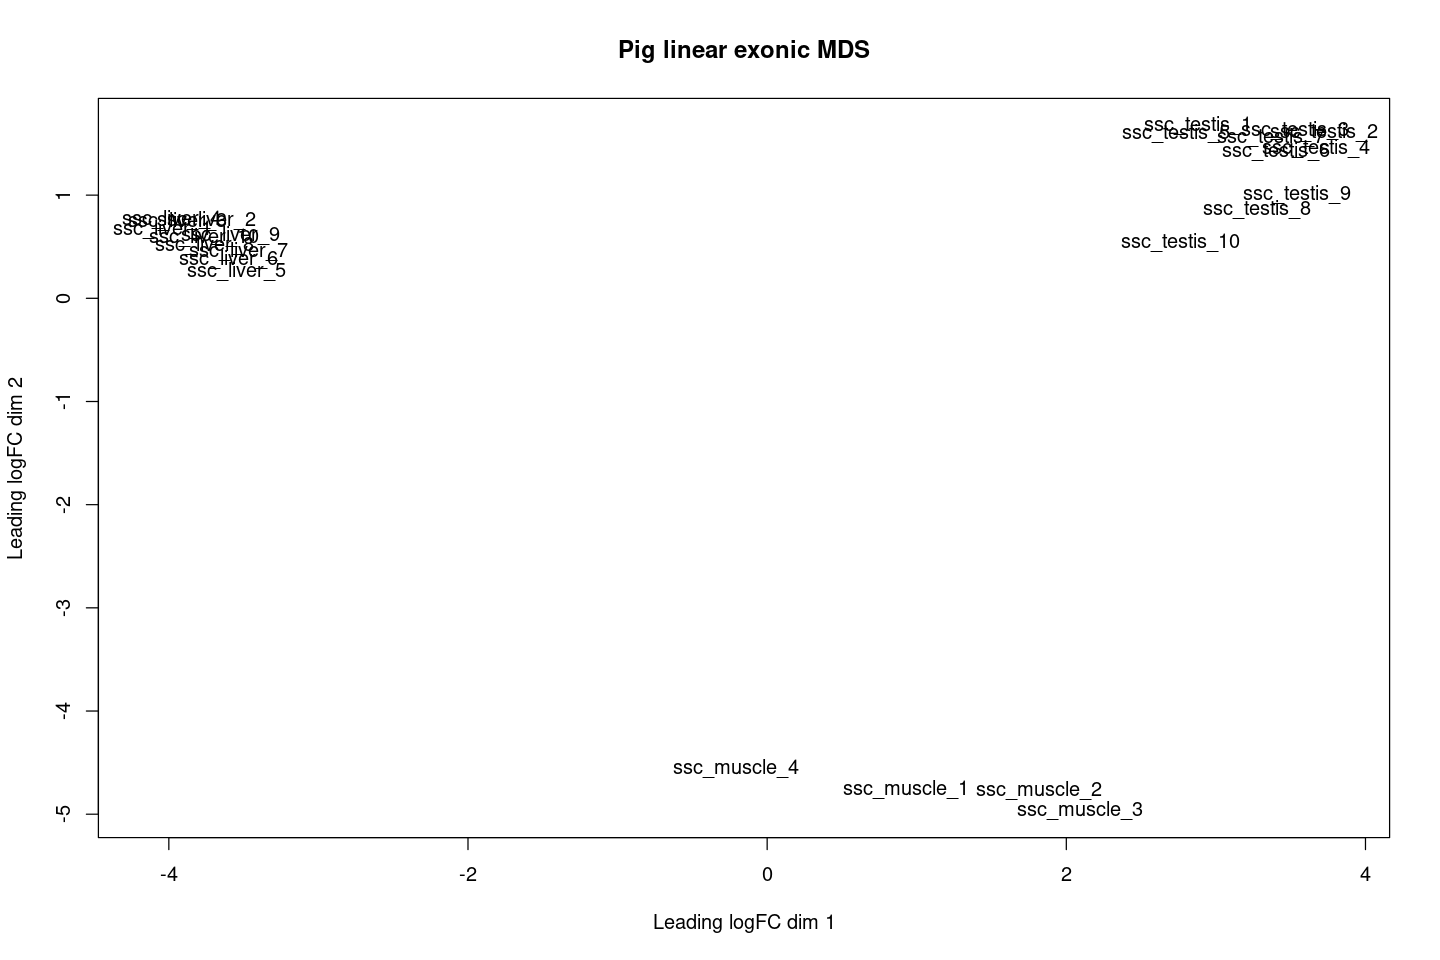

In [25]:
plotMDS(pseudoNormCounts)
title("Pig linear exonic MDS")

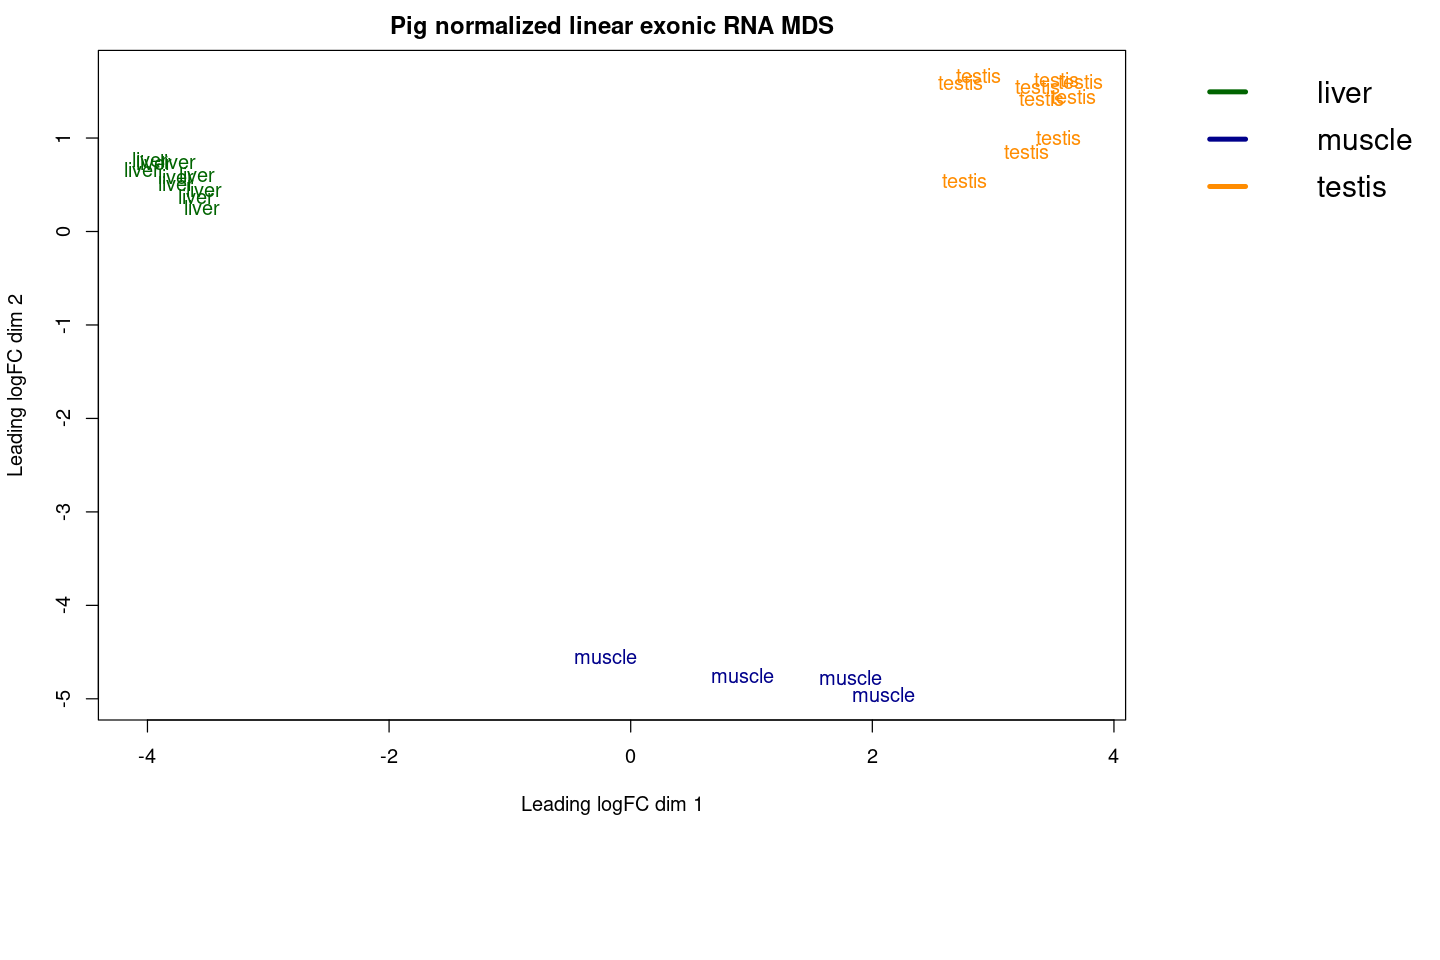

In [26]:
options(repr.plot.width=12, repr.plot.height=8)
labels = c(rep("liver",10), rep("muscle",4), rep("testis", 10))
col = c(rep("darkgreen", 10), rep("darkblue", 4), rep("darkorange", 10))
par(mar=c(10, 4.1, 2.1, 13.1))
par(xpd=FALSE)
plotMDS(pseudoNormCounts, label=labels, col=col)
title("Pig normalized linear exonic RNA MDS")
par(xpd=TRUE)
legend(4.2, 2, legend=c("liver", "muscle", "testis"), col=c("darkgreen", "darkblue", "darkorange"), 
       lty=1:1, lwd=4, cex=1.5, bty = "n", seg.len=0.5)

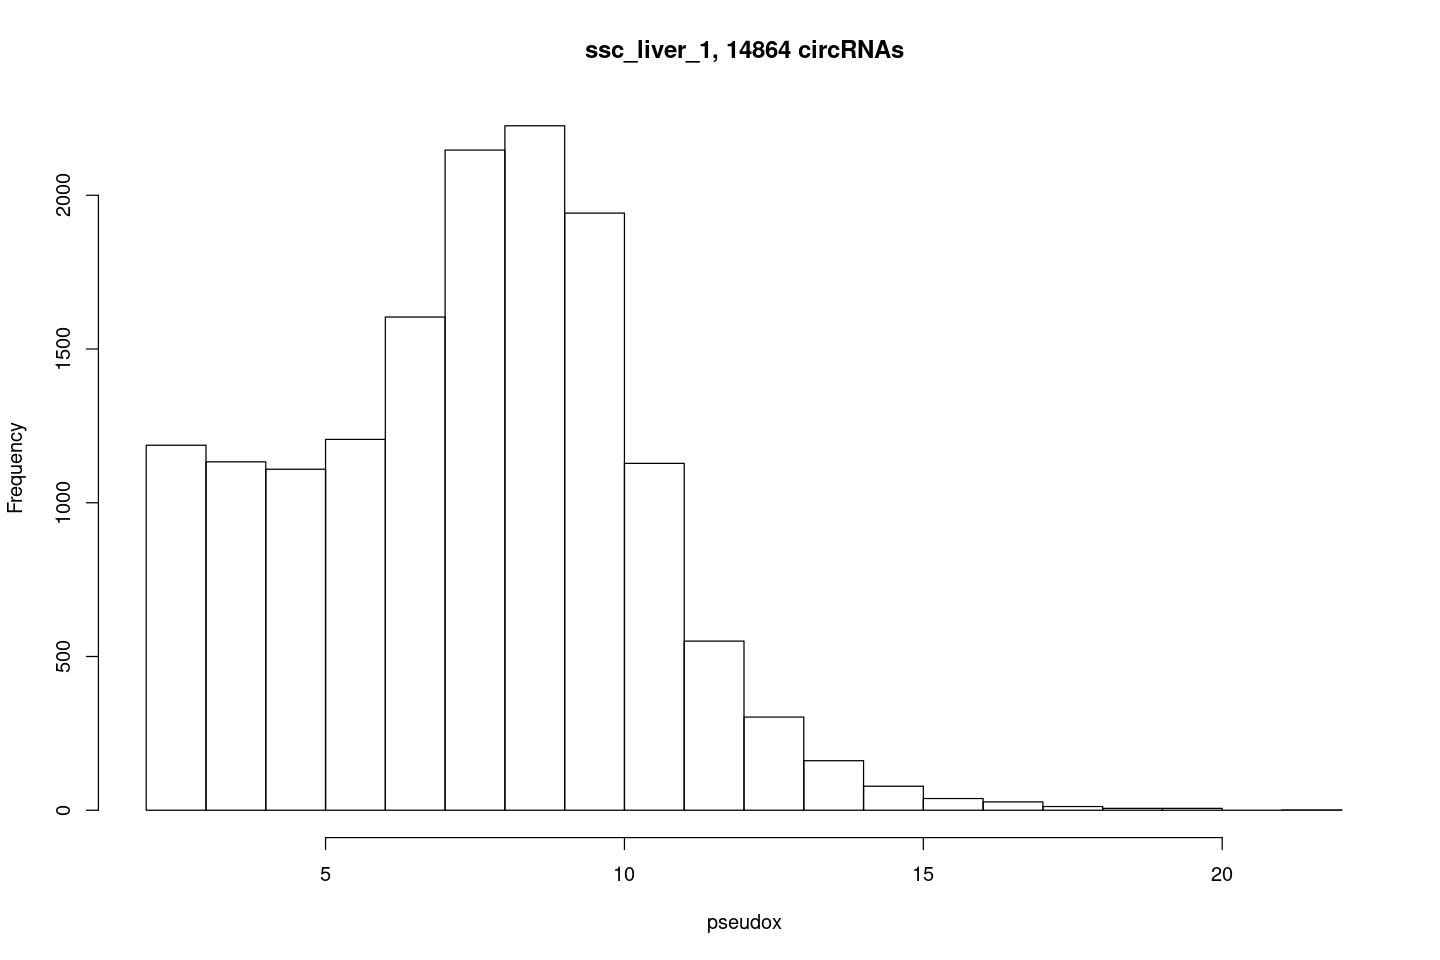

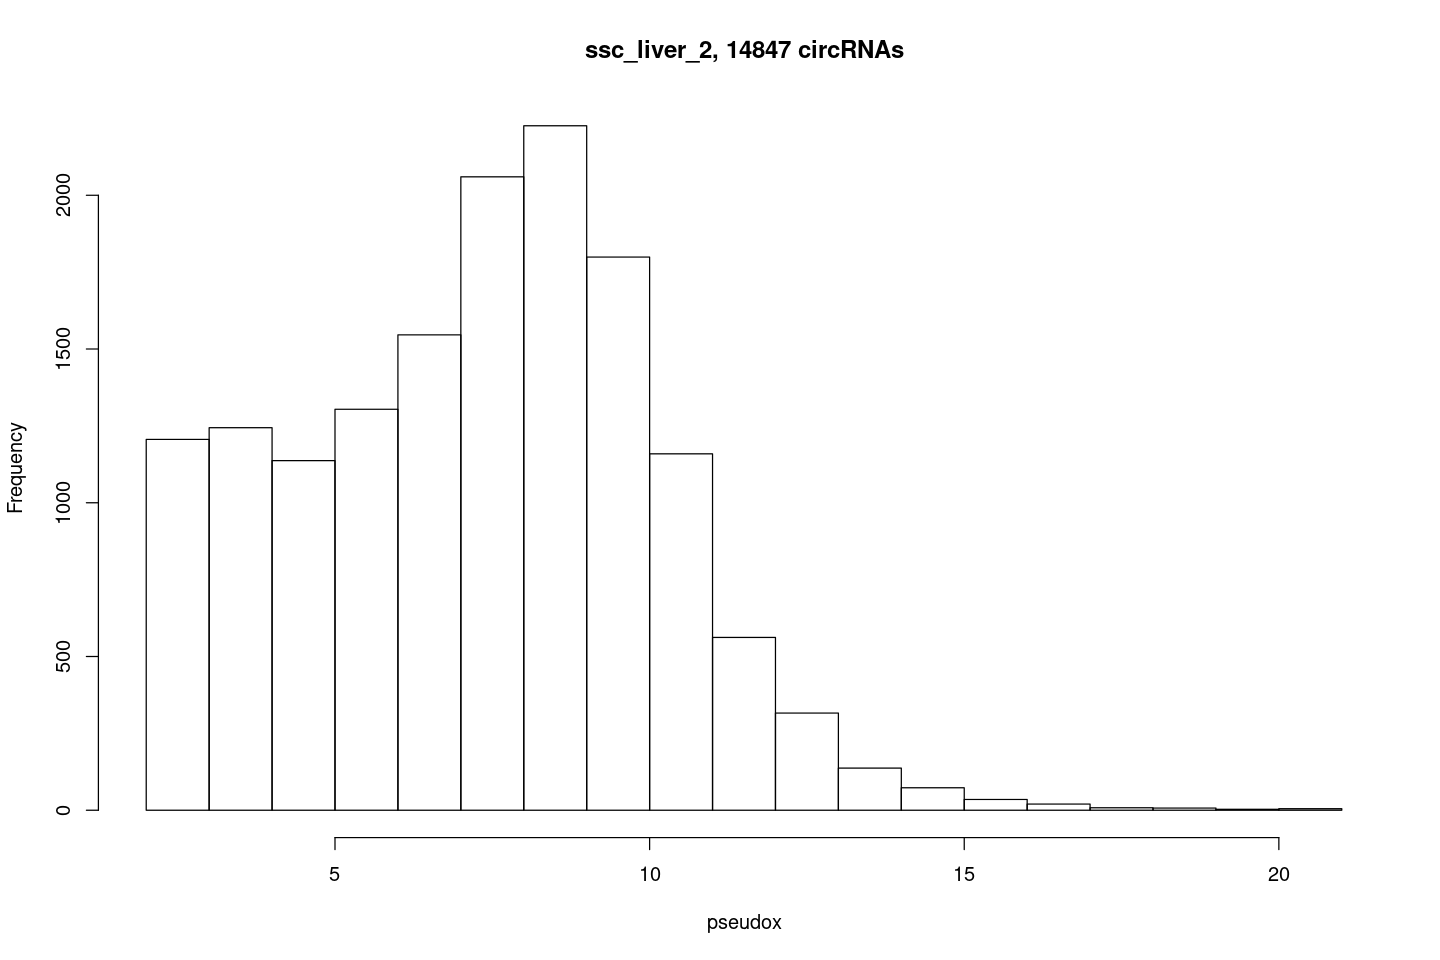

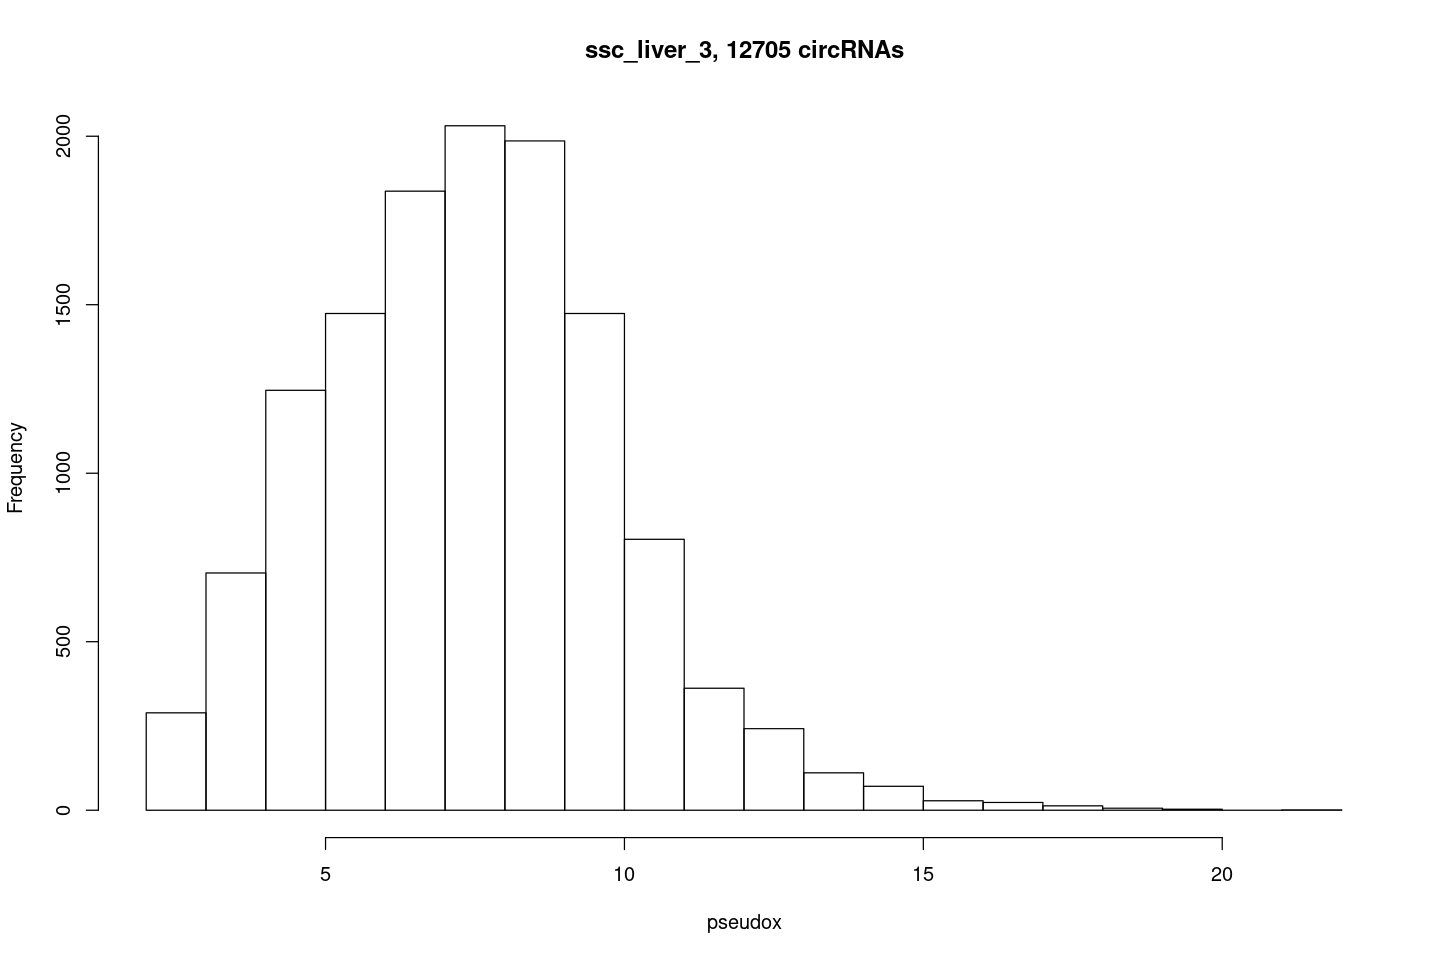

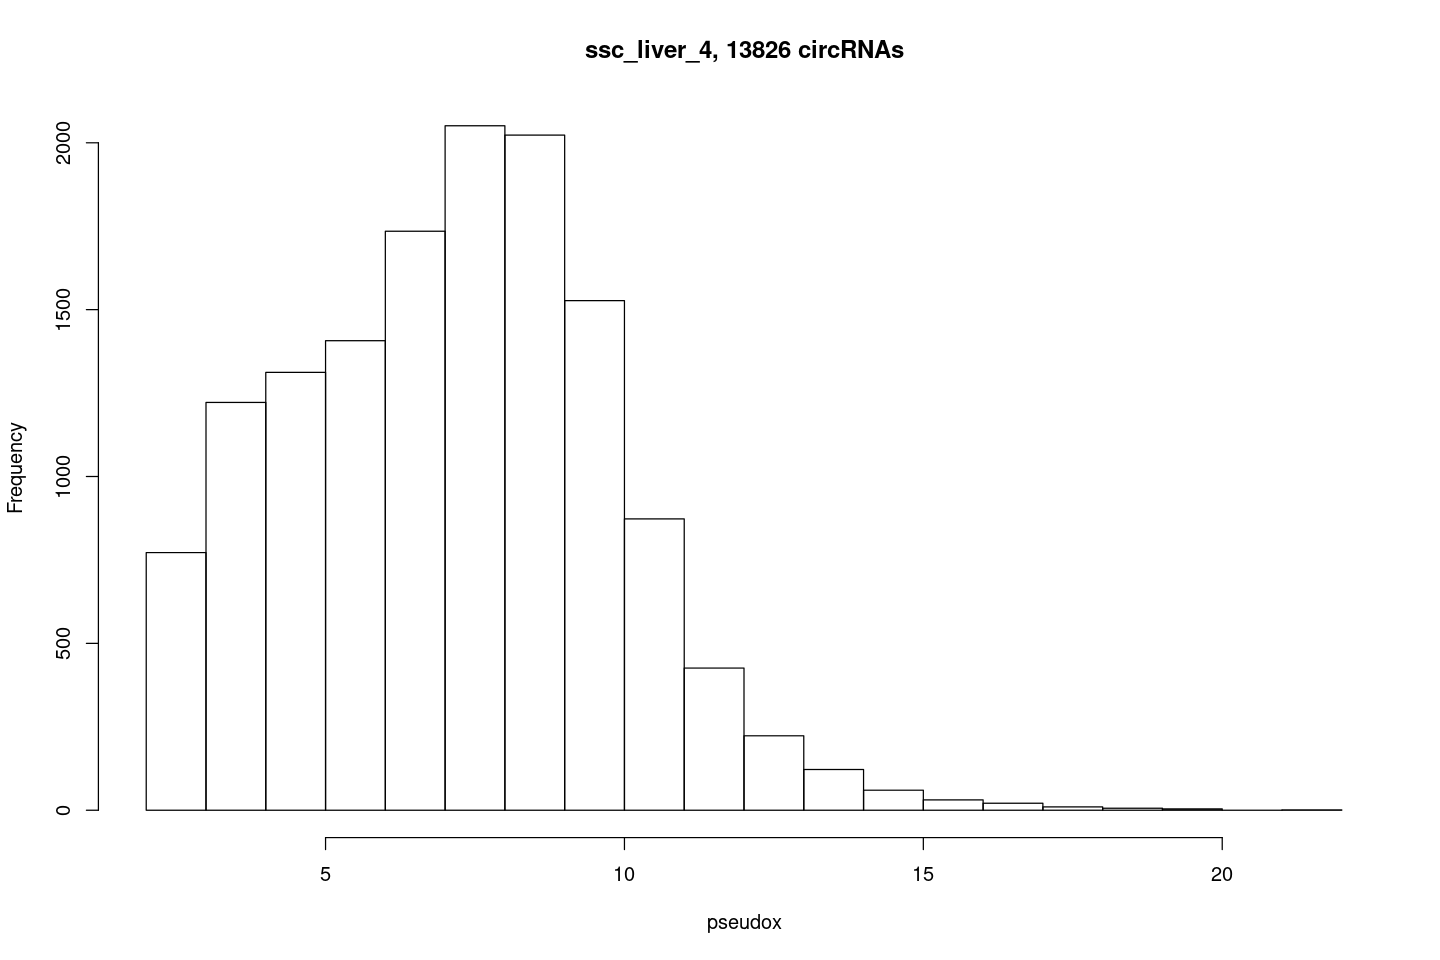

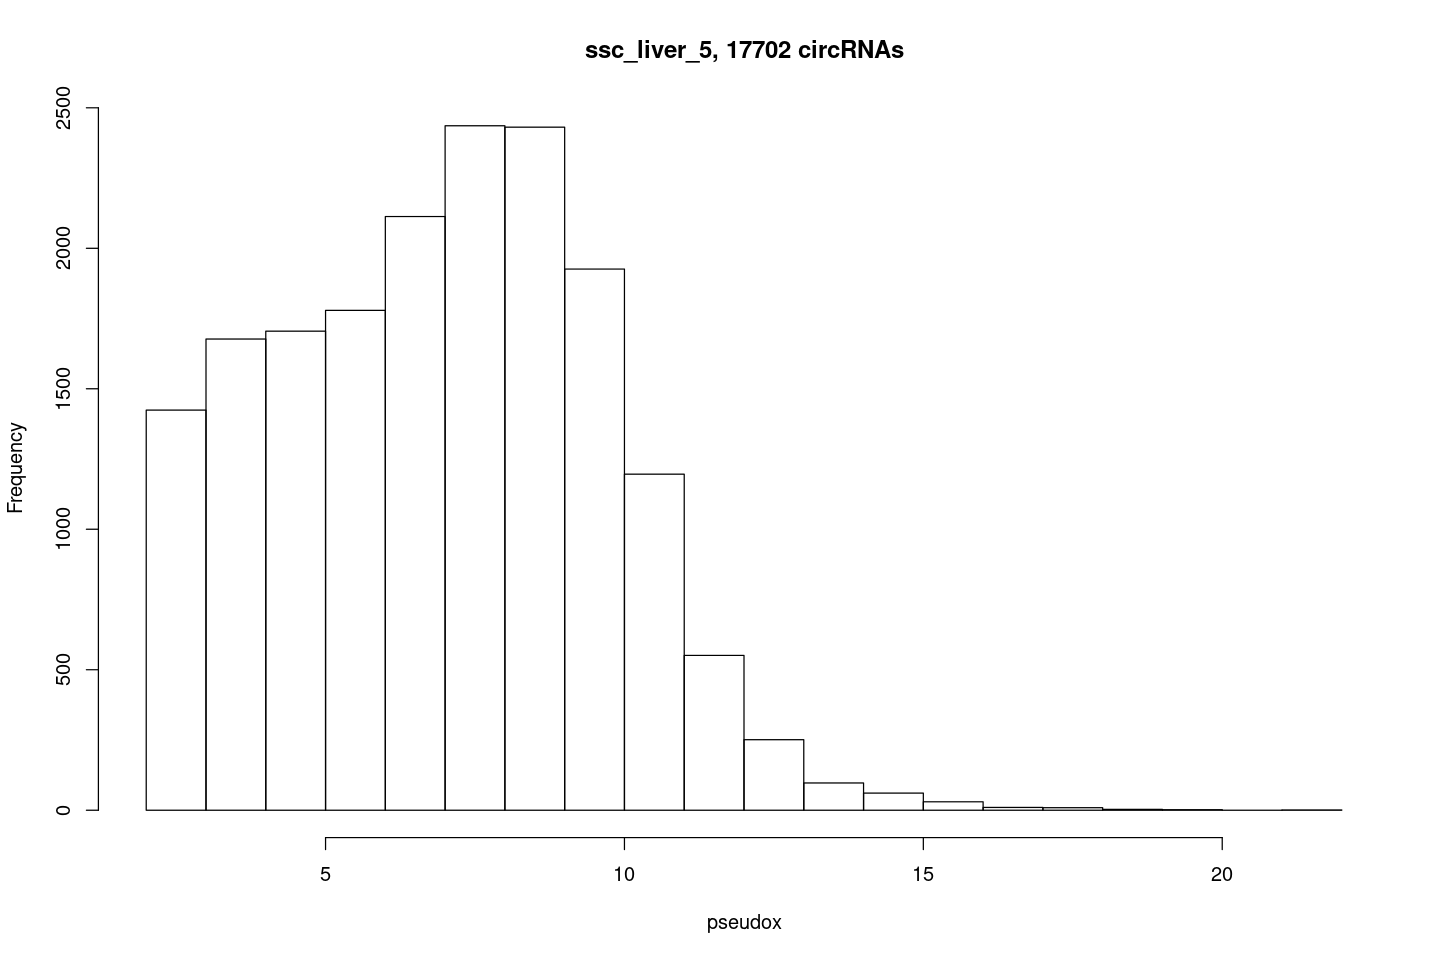

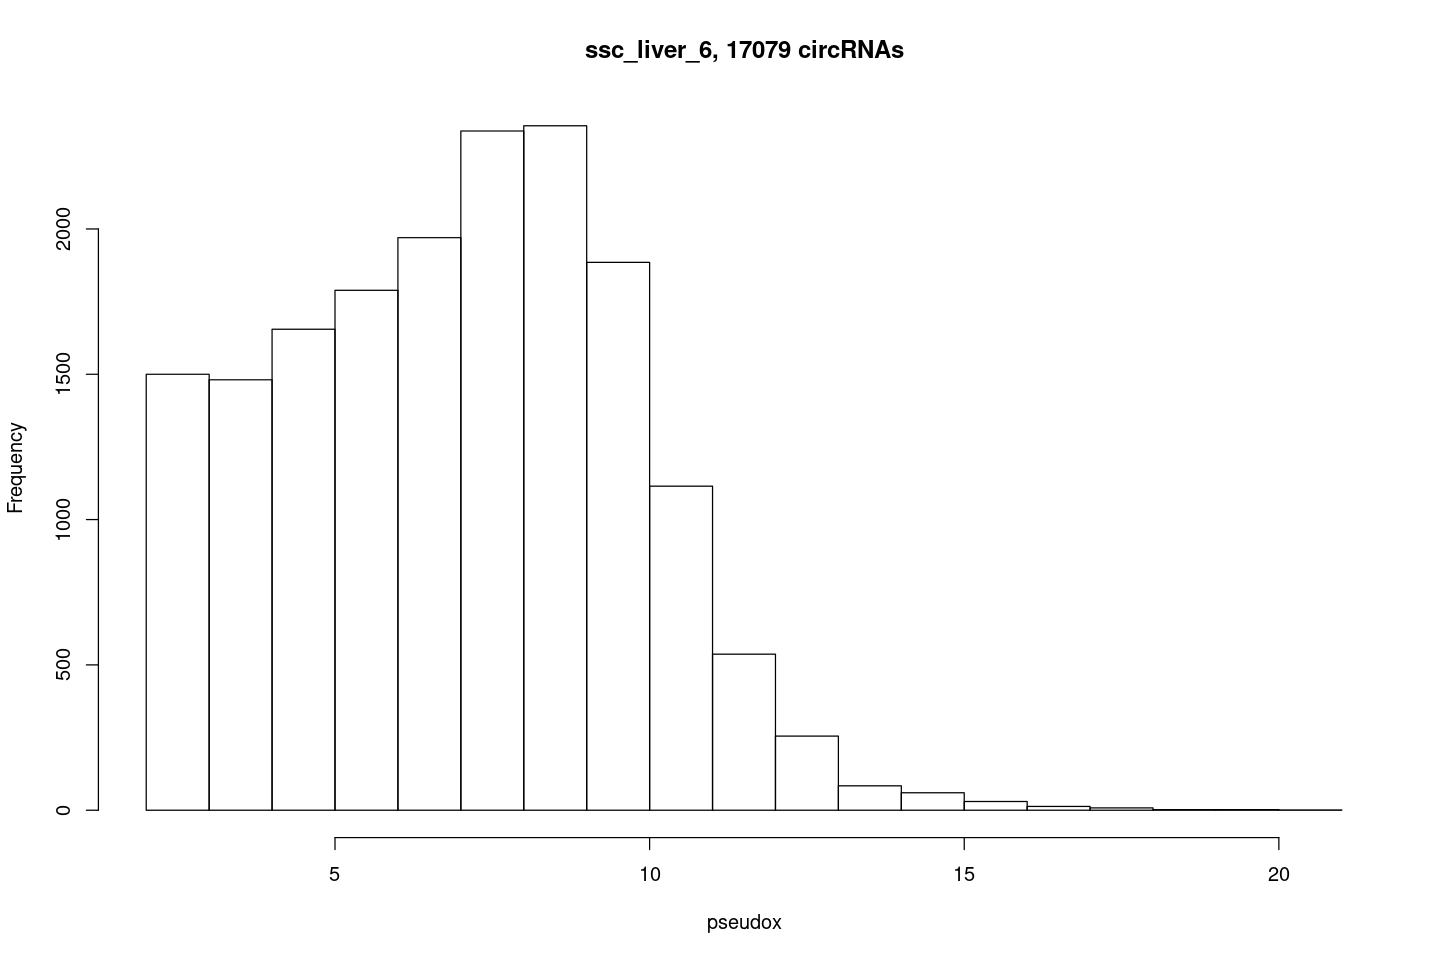

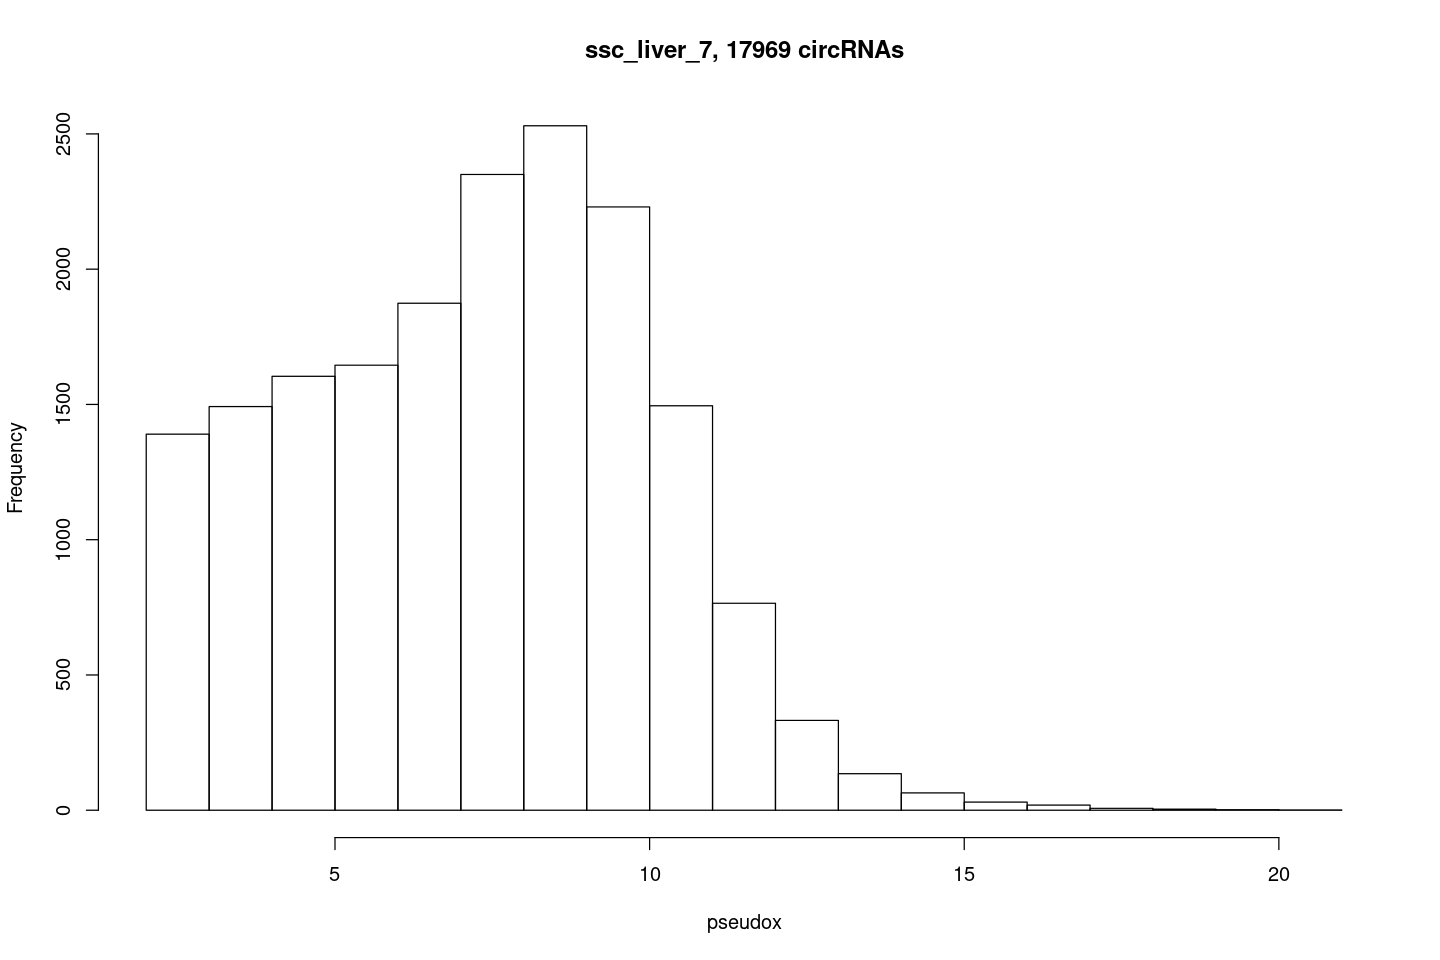

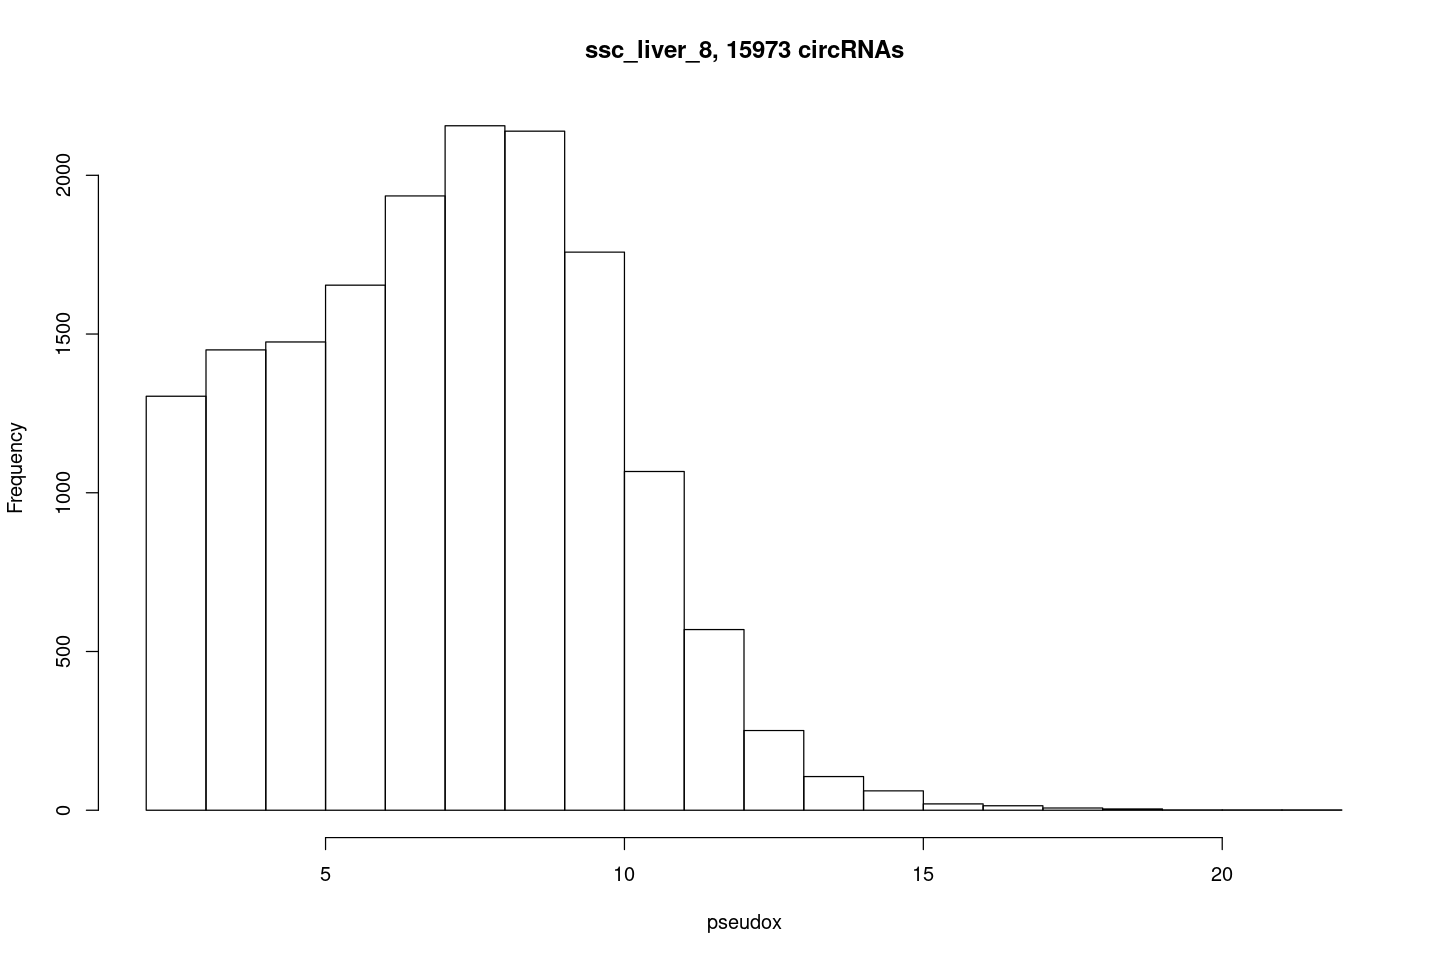

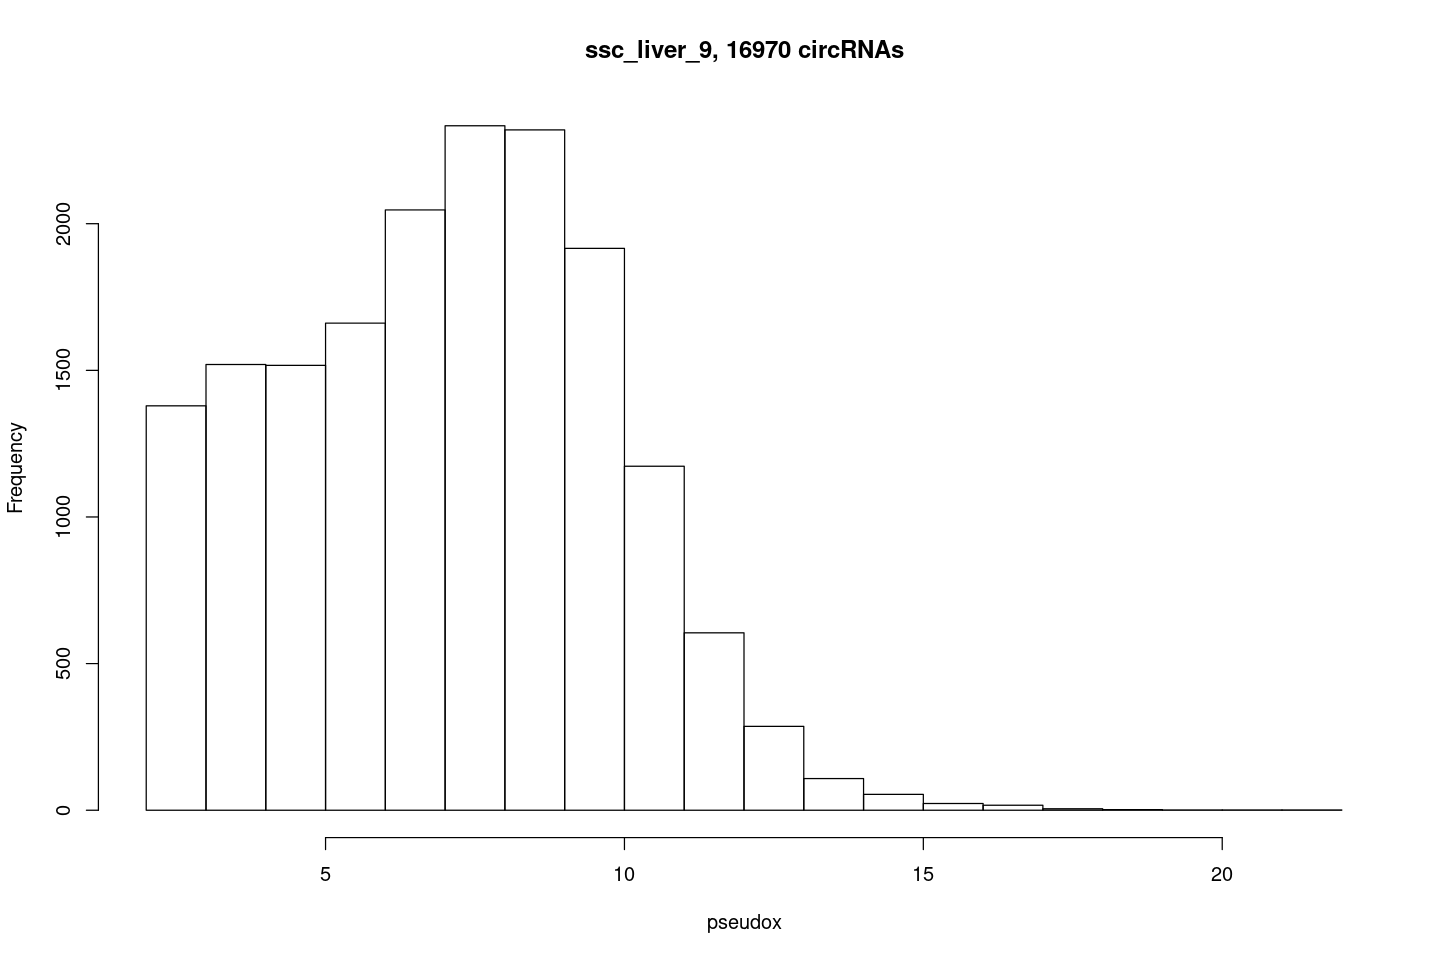

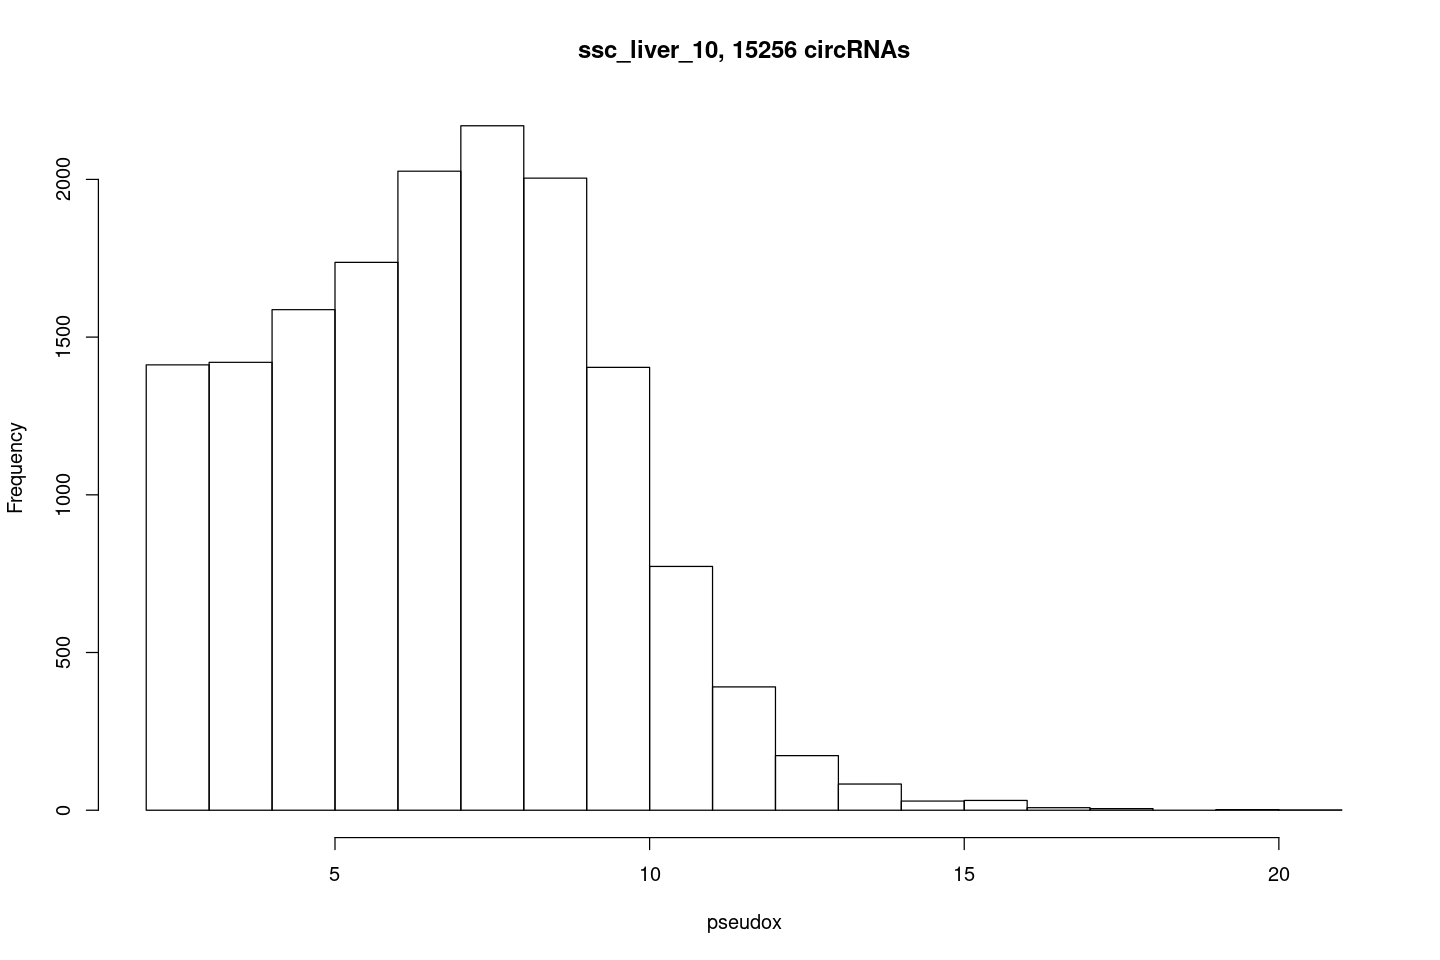

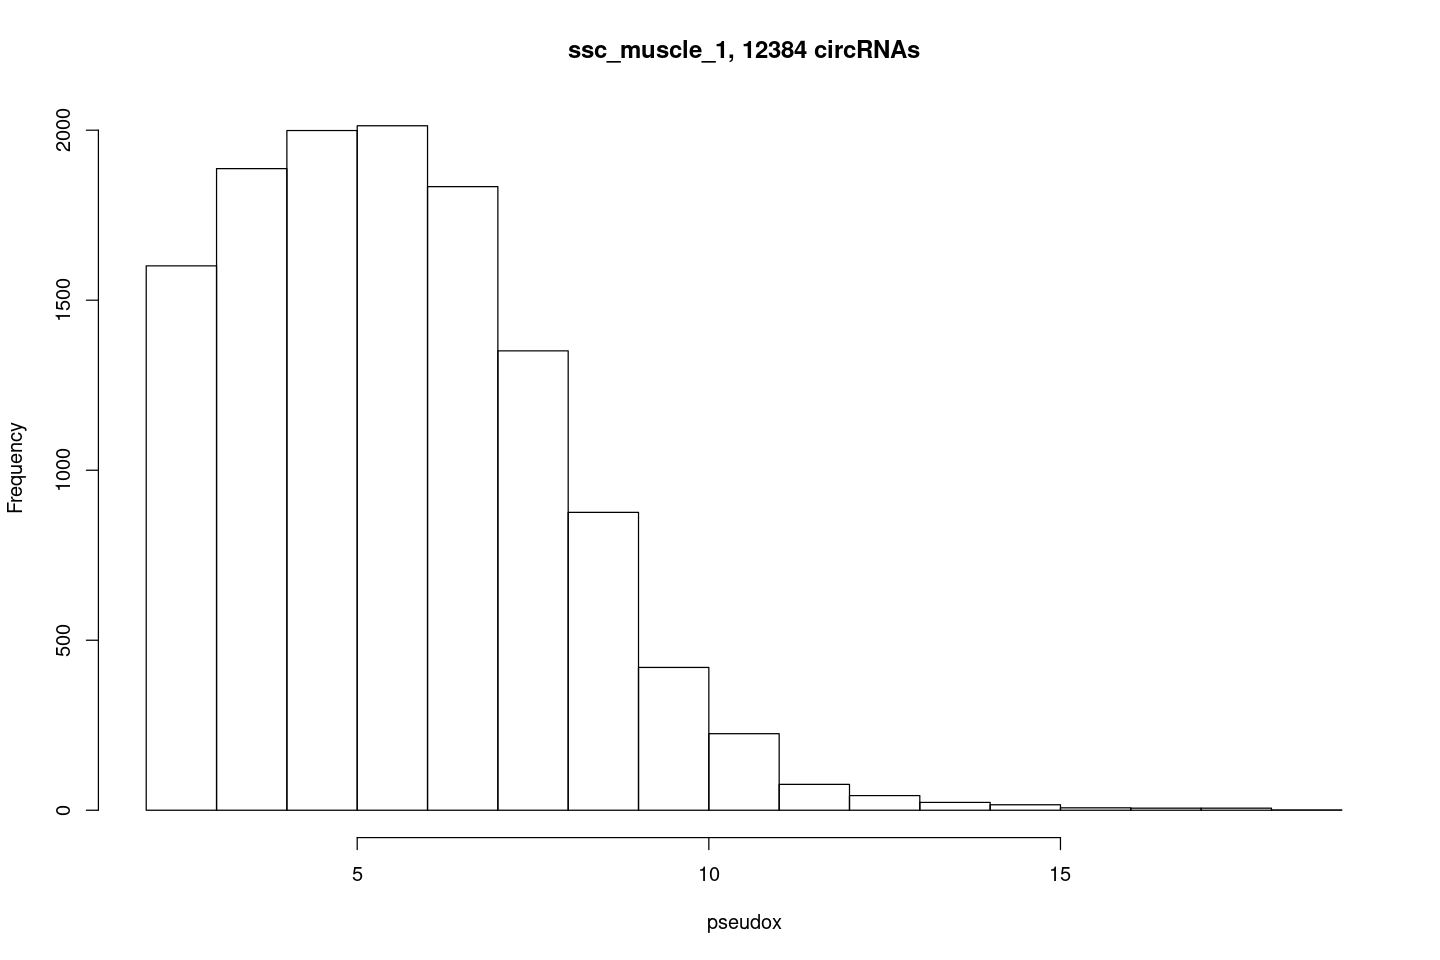

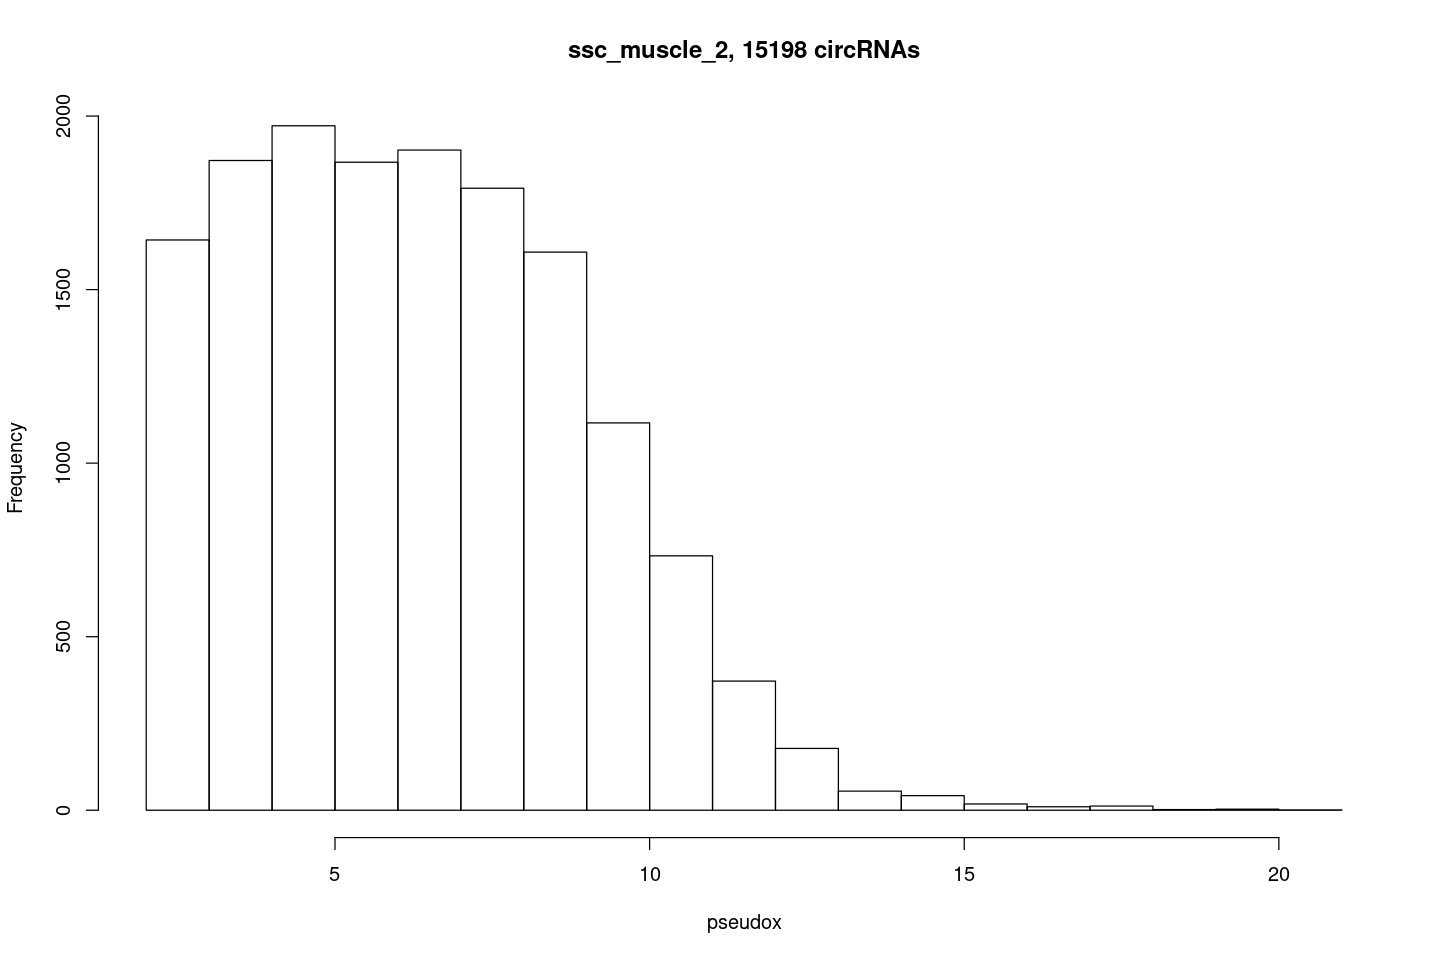

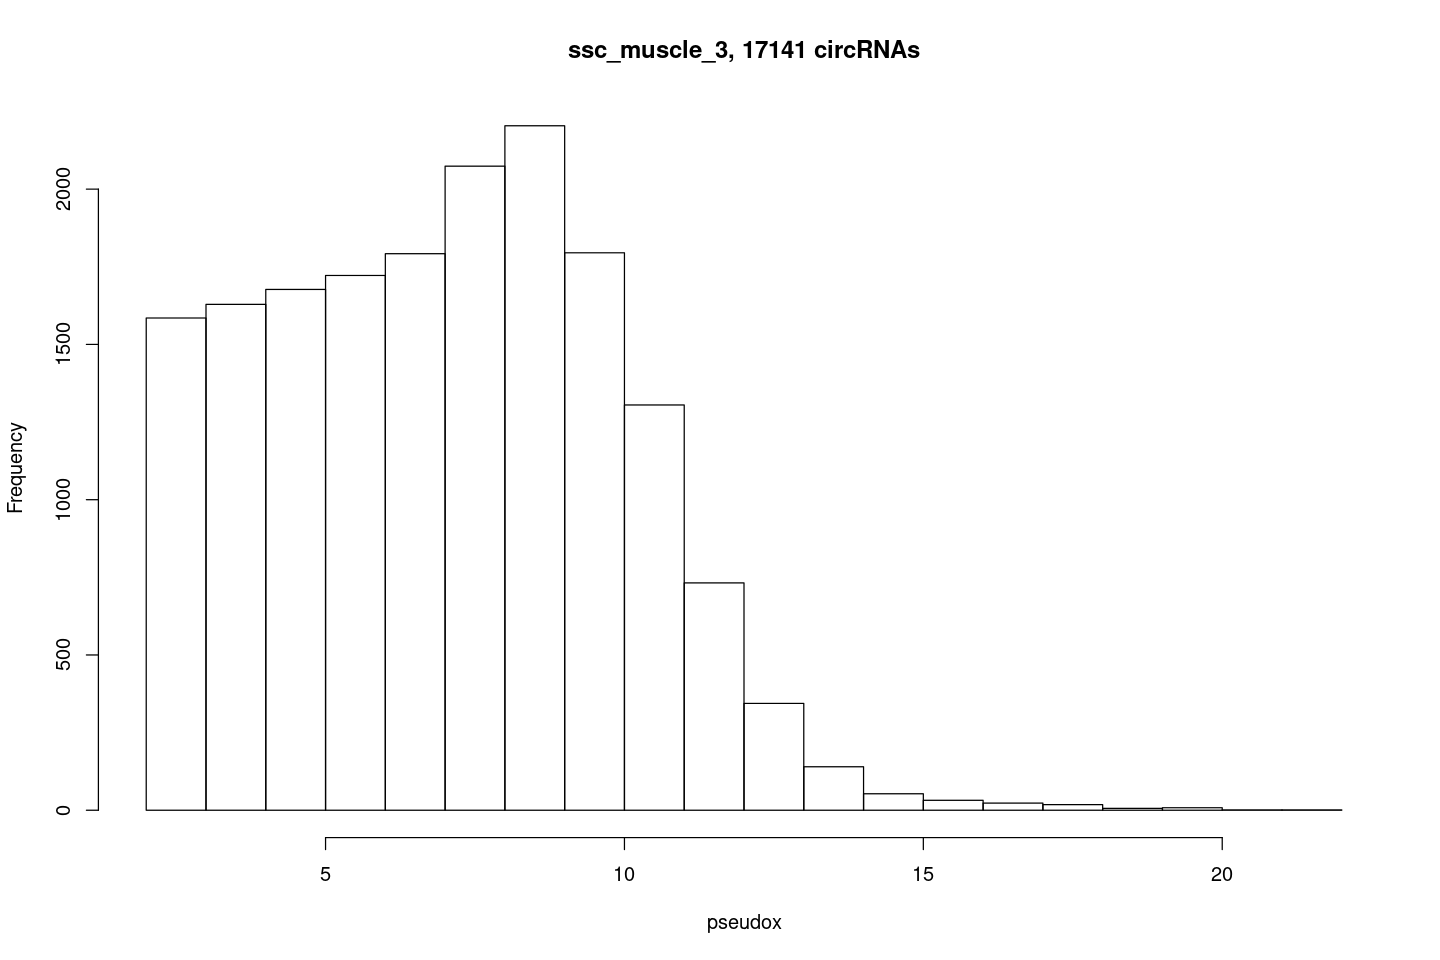

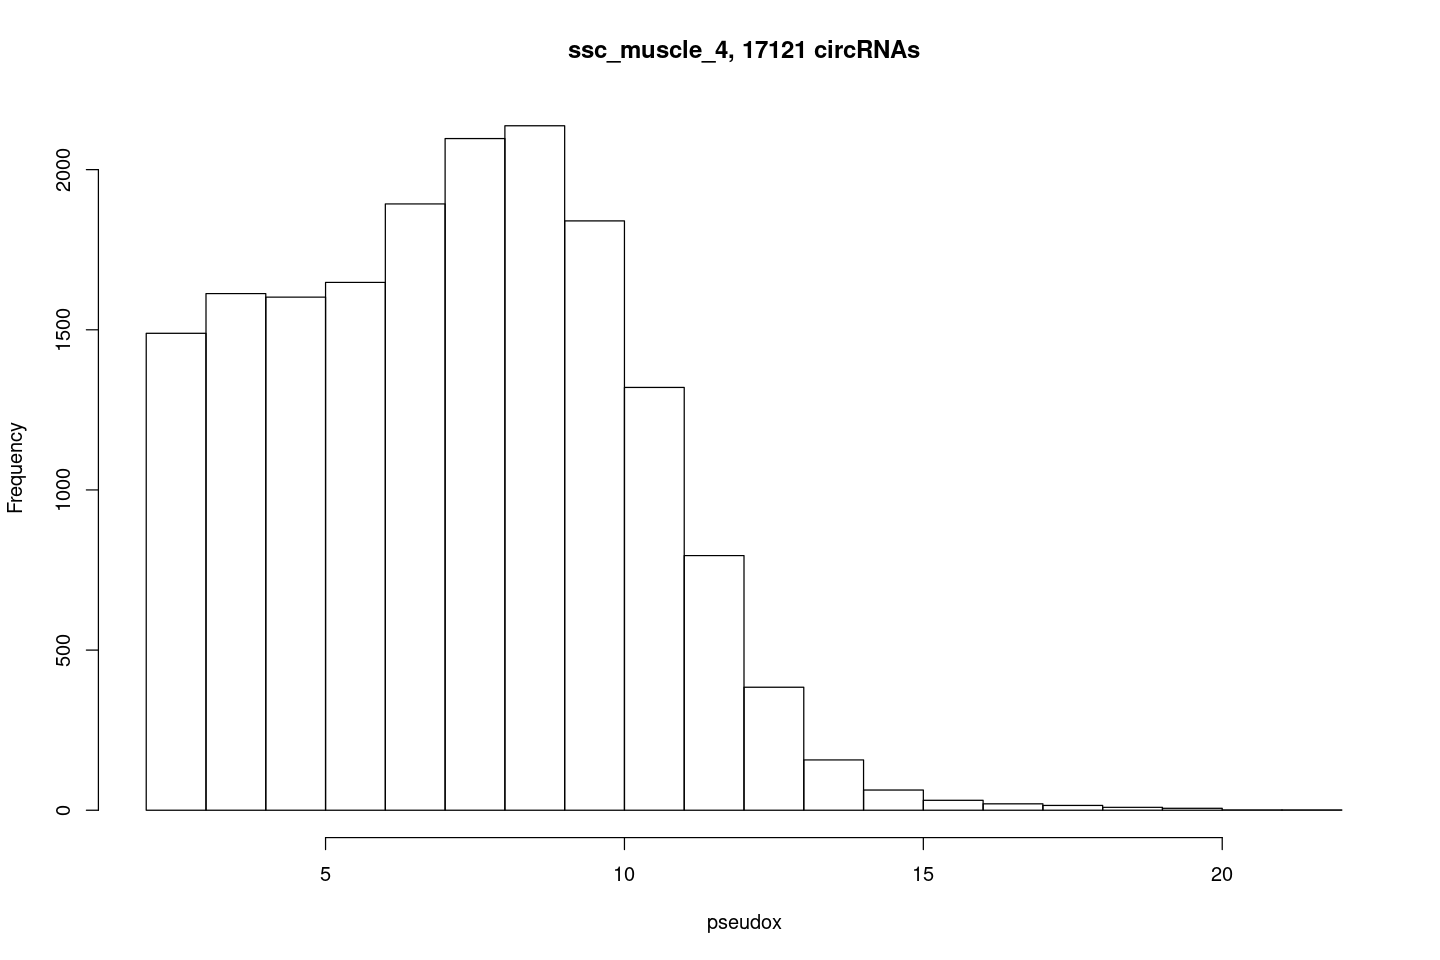

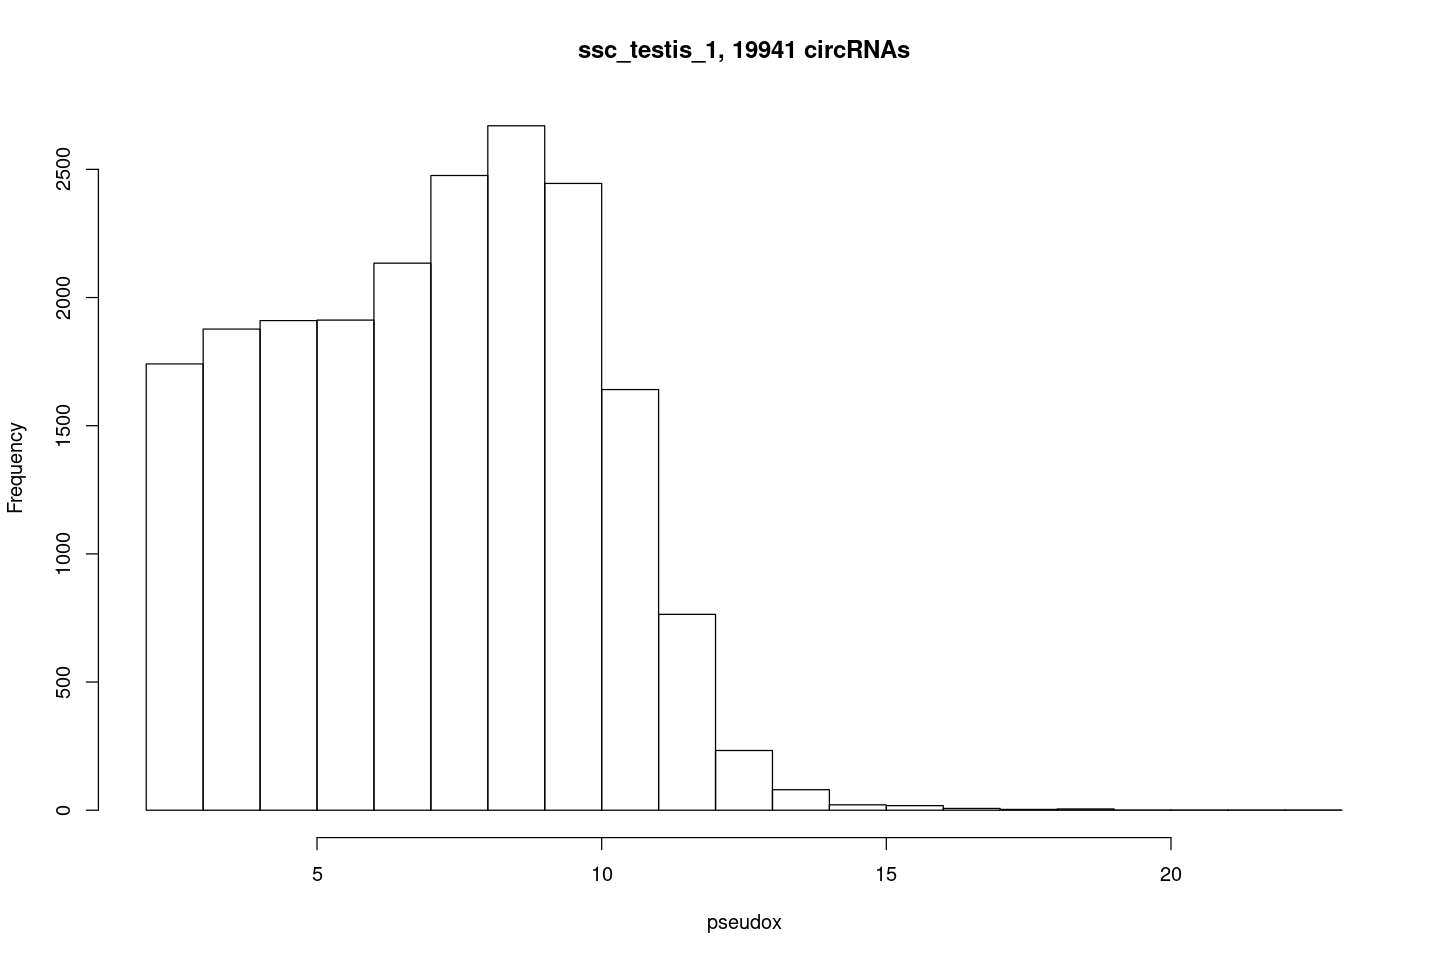

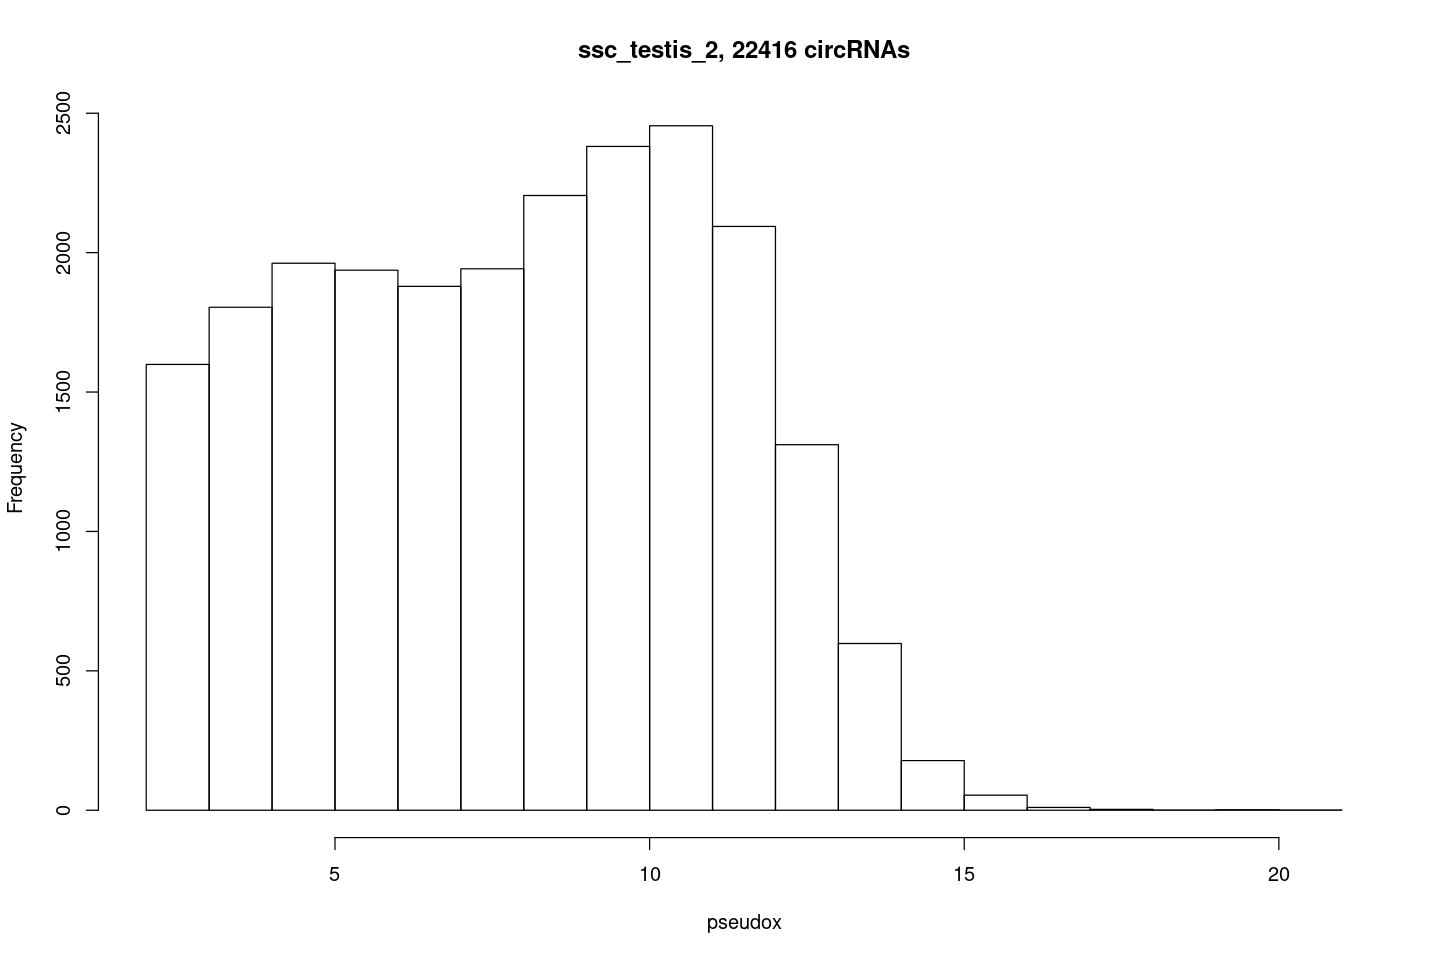

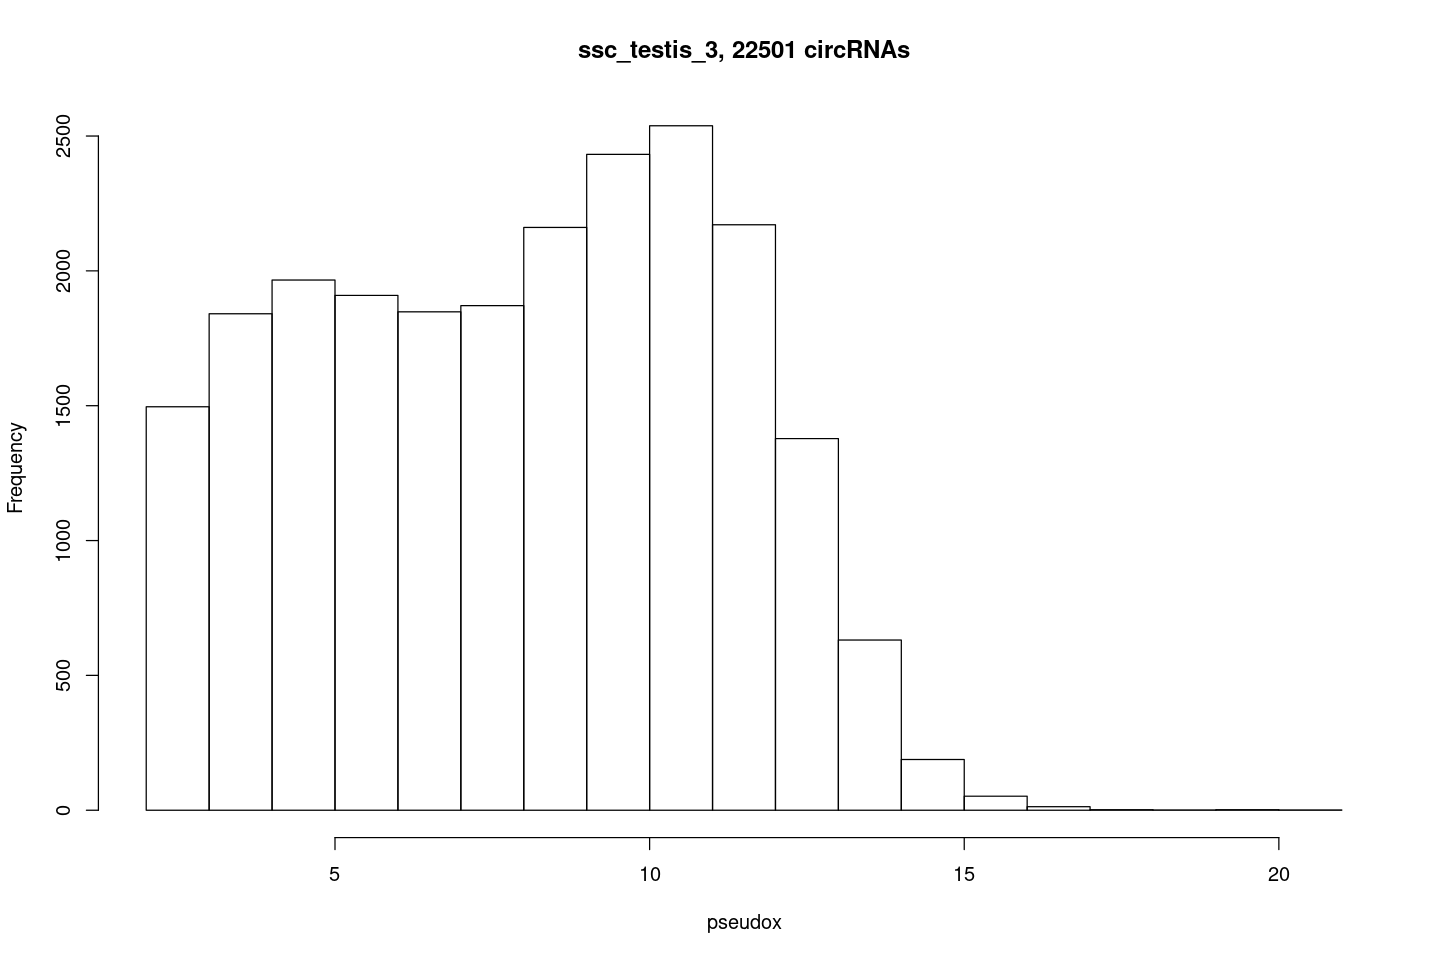

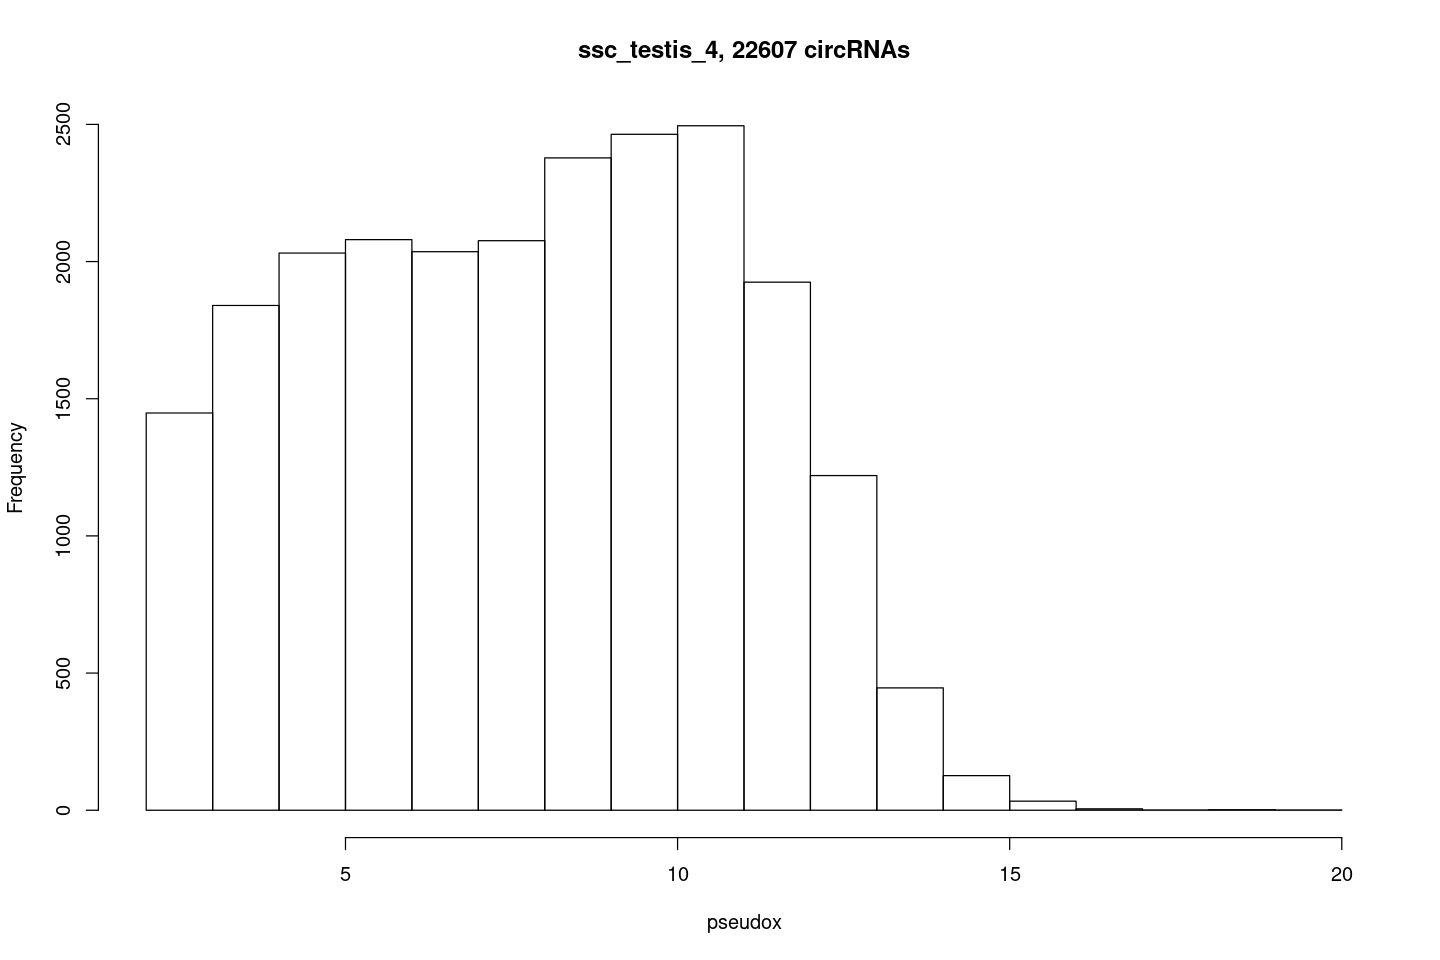

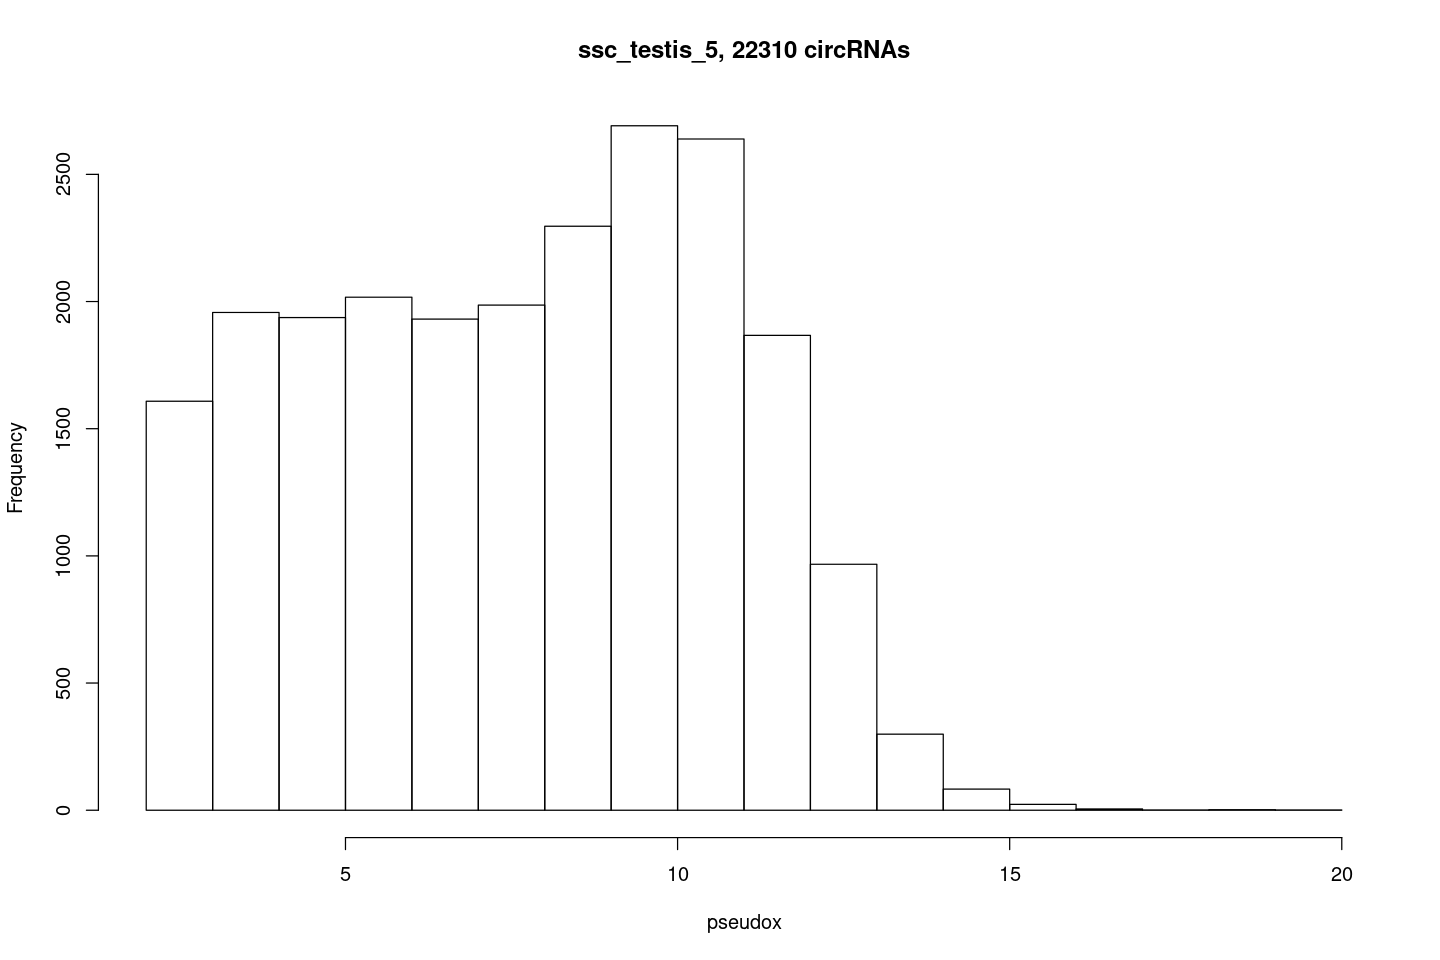

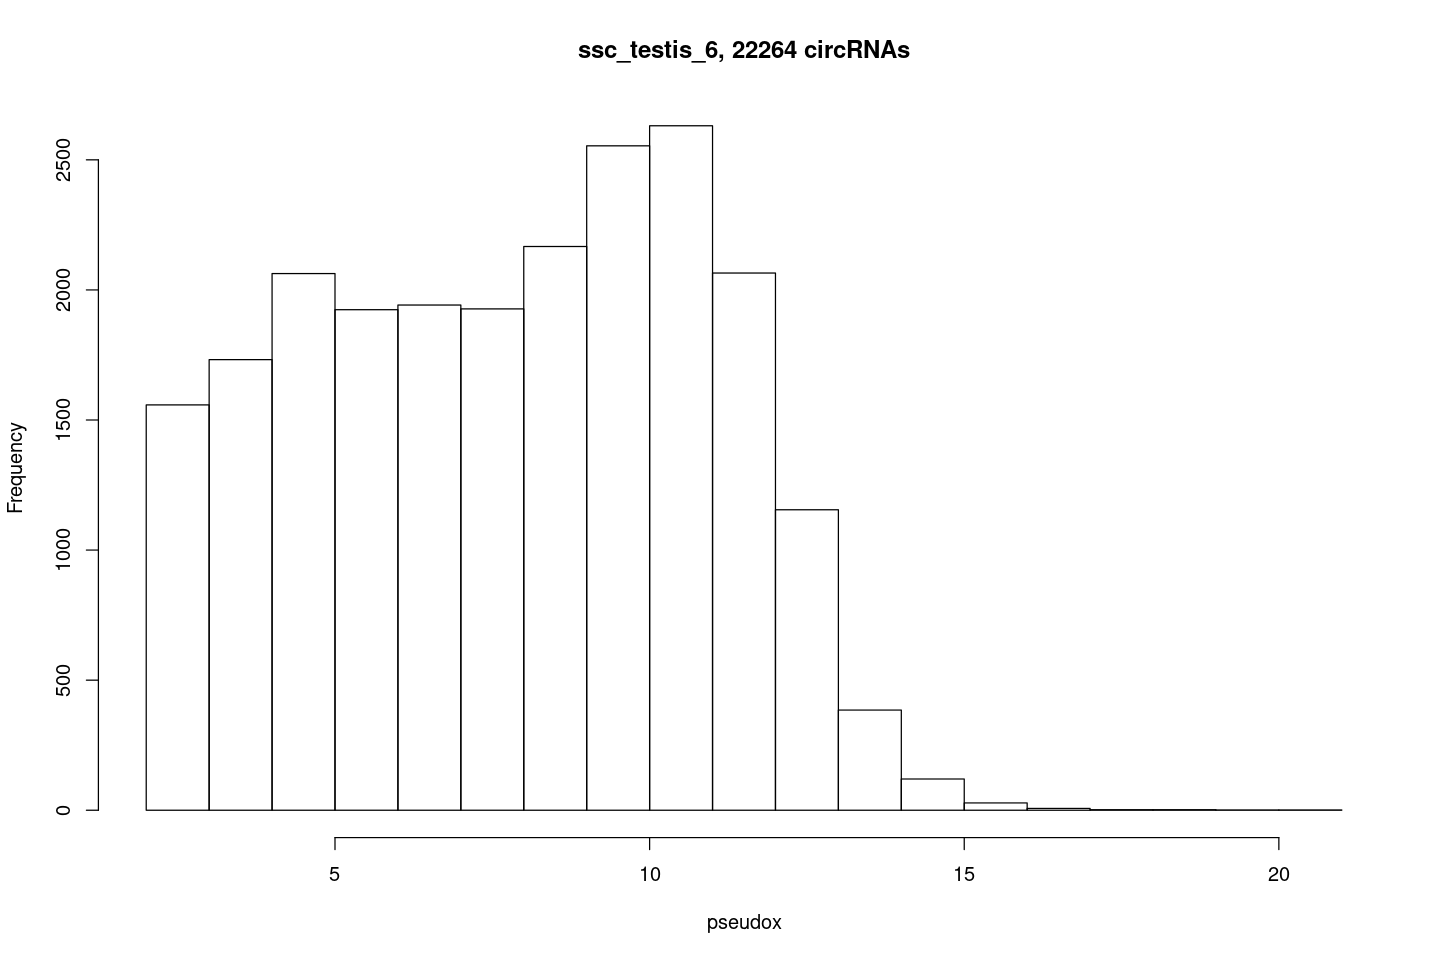

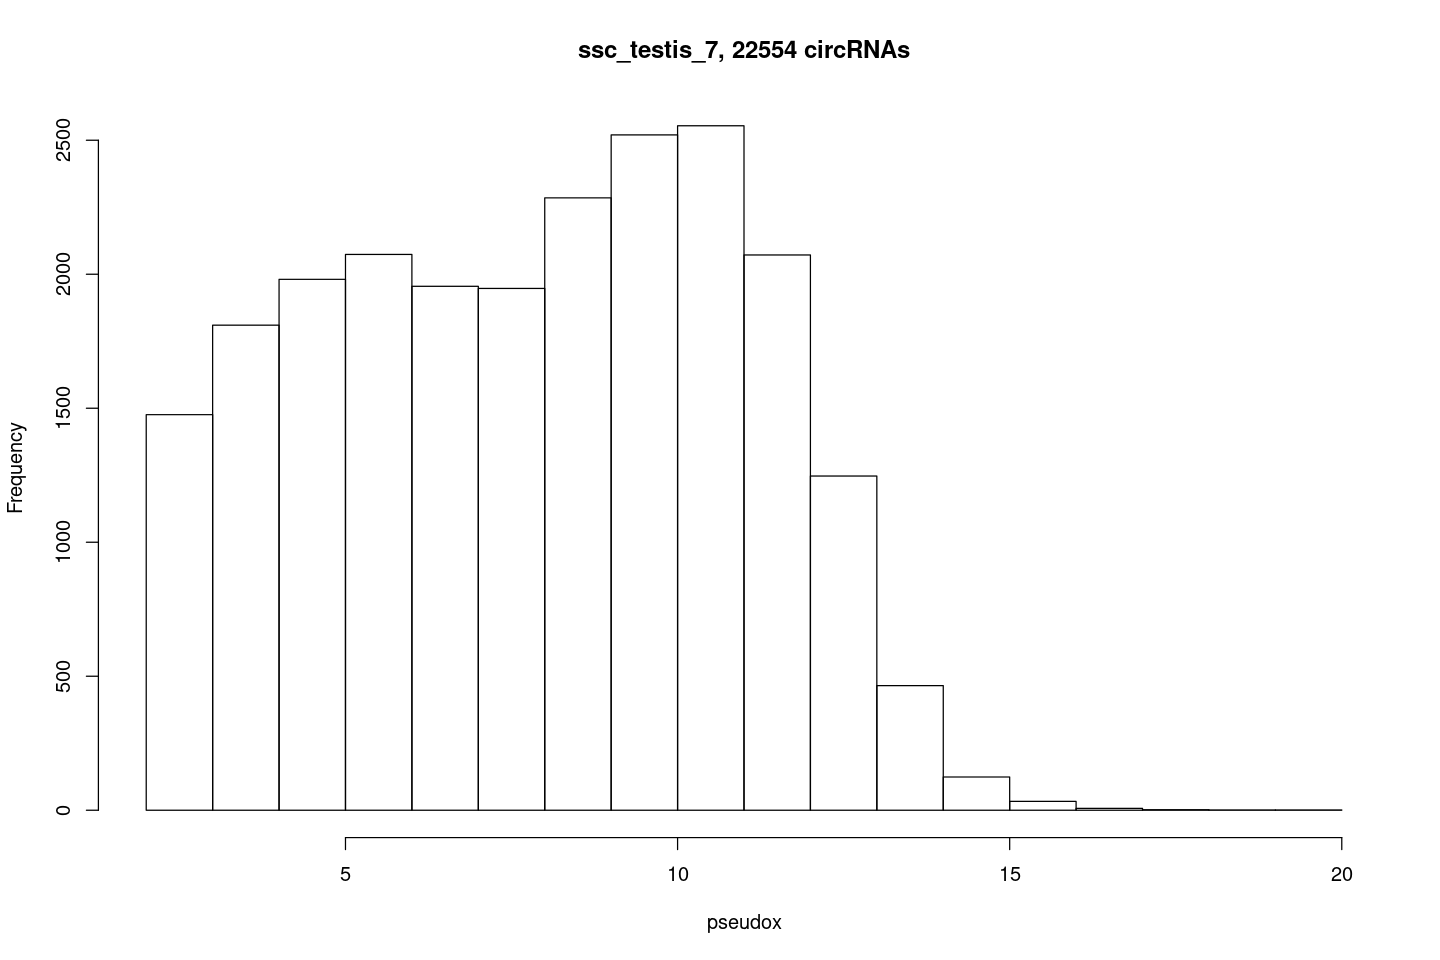

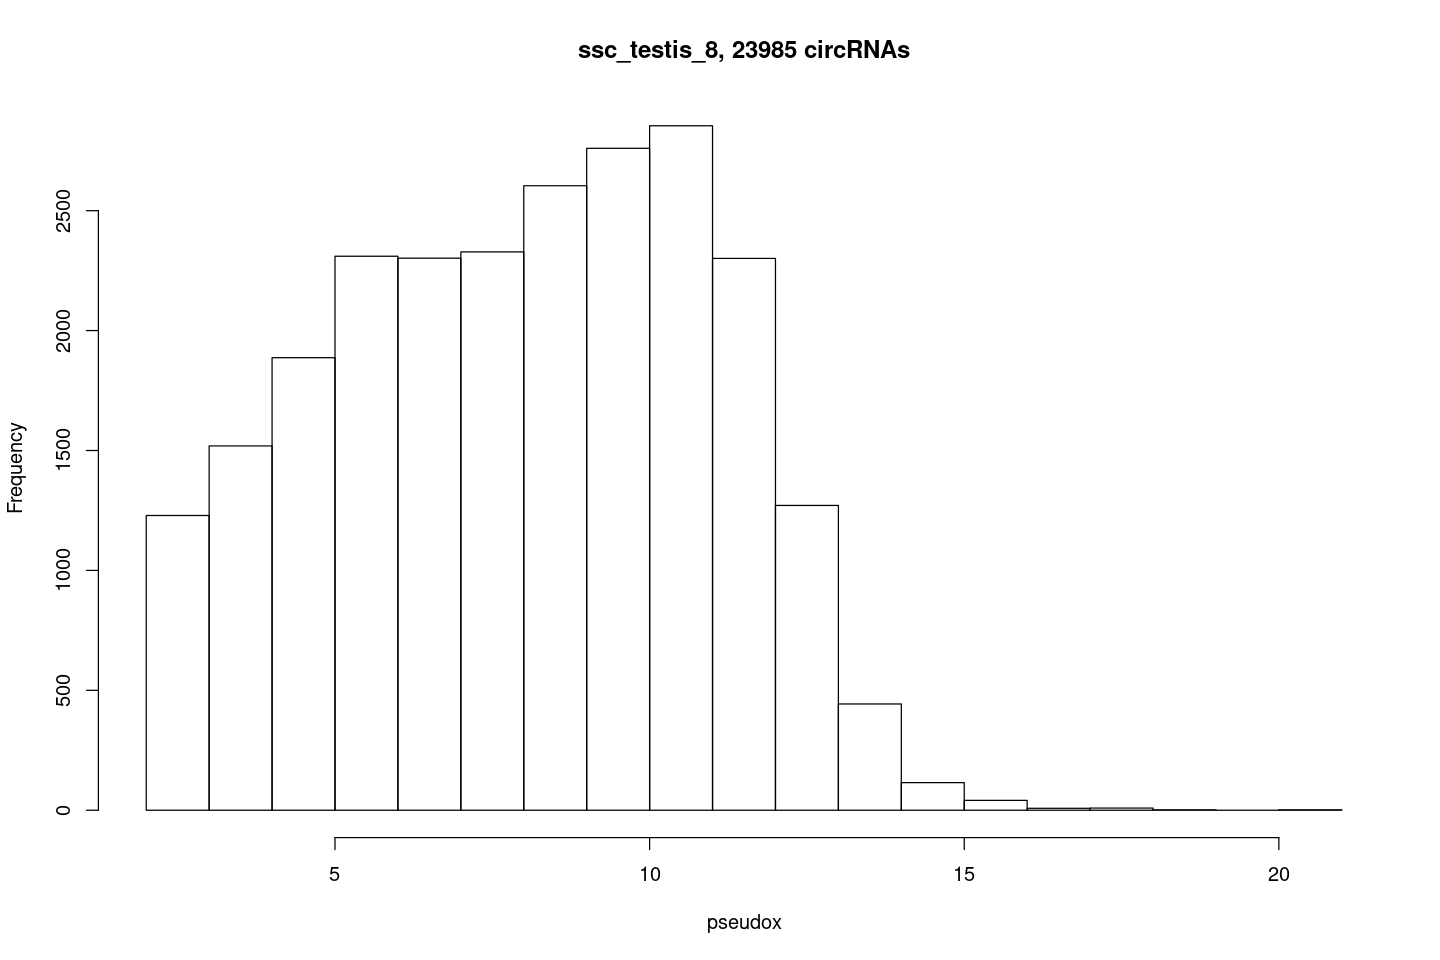

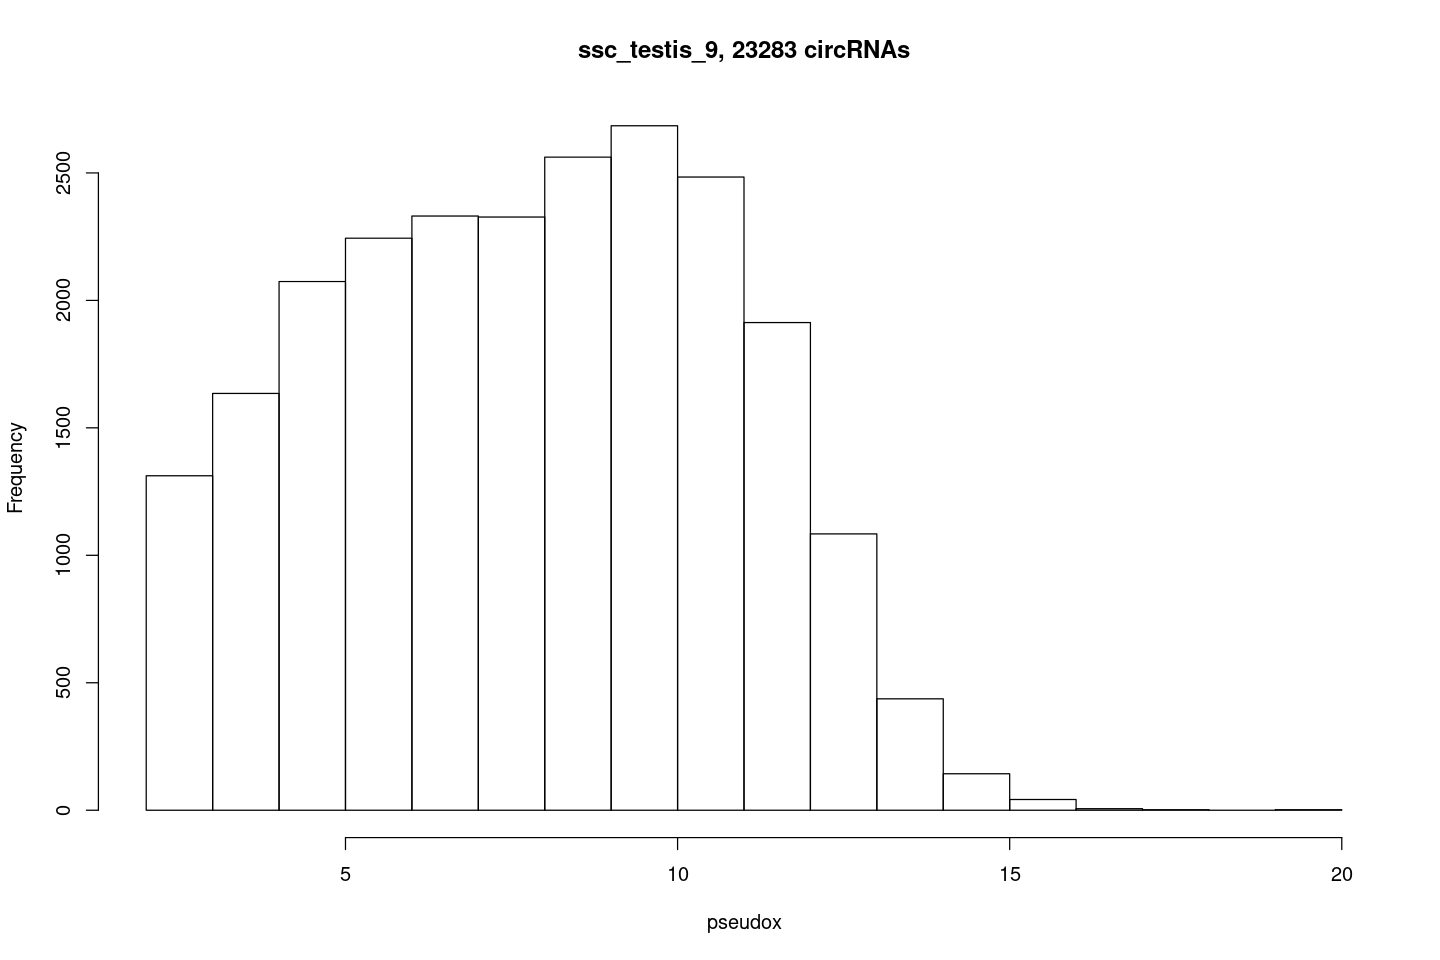

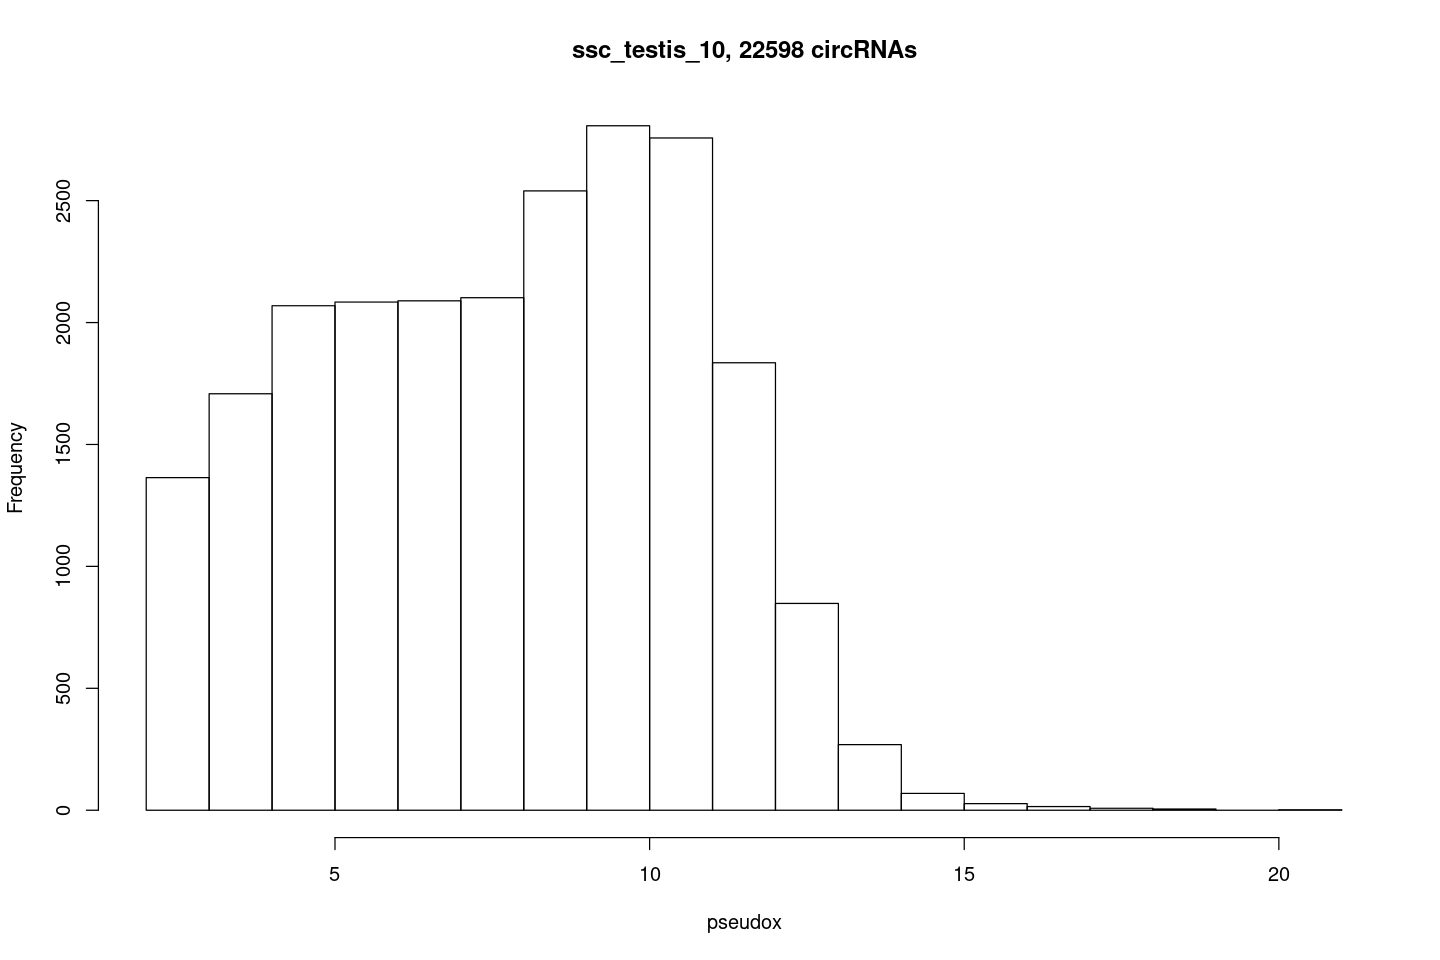

In [27]:
for (i in colnames(Counts)){
    x = Counts[[i]]
    x_sel = x[x>4]
    pseudox = log2(x_sel)
    hist(pseudox, main=sprintf("%s, %d circRNAs", i, length(x_sel)))
}